# Text Cleaning

Mục tiêu của toàn bộ quá trình này là giúp mô hình học máy (Machine Learning) hoặc mô hình học sâu (Deep Learning) nhận được đầu vào “sạch” và “chuẩn hoá”, từ đó đạt hiệu quả cao hơn trong phân tích và dự đoán.

![](https://spacy.io/images/pipeline.svg)

**NLP Python packages:**

|NLP Library|	Description|
|---|---|
|NLTK	|This is one of the most usable and mother of all NLP libraries.|
|spaCy	|This is a completely optimized and highly accurate library widely used in deep learning|
|Stanford CoreNLP| Python	For client-server-based architecture, this is a good library in NLTK. This is written in JAVA, but it provides modularity to use it in Python.|
|TextBlob	|This is an NLP library which works in Pyhton2 and python3. This is used for processing textual data and provide mainly all type of operation in the form of API.|
|Gensim	|Genism is a robust open source NLP library support in Python. This library is highly efficient and scalable.|
|Pattern	|It is a light-weighted NLP module. This is generally used in Web-mining, crawling or such type of spidering task|
|Polyglot	|For massive multilingual applications, Polyglot is best suitable NLP library. Feature extraction in the way on Identity and Entity.|
|PyNLPl	|PyNLPI also was known as ‘Pineapple’ and supports Python. It provides a parser for many data formats like FoLiA/Giza/Moses/ARPA/Timbl/CQL.|
|Vocabulary	|This library is best to get Semantic type information from the given text.|
|pyvi	| Python Vietnamese Core NLP Toolkit |
|underthesea| Underthesea - Vietnamese NLP Toolkit |


**The process of NLP Preprocessing is as follows:**
1. General cleaning
    - Case normalization
    - Normalize grammatical structure
    - Regular expression handling
2. Removing noise from the dataset
    - Removing special characters/patterns
    - Removing punctuations
    - Removing stop words
    - Remove unnecessary components: table, image, etc.
3. Normalizing text to right-format for the ML Algorithm
    - Tagging: Part-of-speech tagging, named-entity recognition
    - Stemming / Lemmatization
4. Tokenization
5. Text Mining

In [56]:
import numpy as np
import pandas as pd
import re
import nltk  # type: ignore
import spacy  # type: ignore
import string  # type: ignore
import html


pd.options.mode.chained_assignment = None
pd.set_option("display.max_colwidth", None)

data = pd.read_csv(
    r"contents\theory\aiml_algorithms\dl_nlp\data\labeled_data.csv",
    usecols=["class", "tweet"],
)

data.head()  # class: 0-hate speech, 1-offensive, 2-neither

class  \
0      2   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                          tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...  
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!  
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit  
3                                                                                !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny  
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;

## General Cleaning

1. **Case Normalization**: Thường chuyển tất cả về chữ thường (lowercase) để giảm độ phức tạp khi so sánh từ. However, do remember that **lowercasing can change the meaning of some text** e.g "US" vs "us".

2. **Sửa lỗi chính tả (nếu cần)**: Trong một số bài toán phân tích ngôn ngữ, việc chính tả chính xác có ý nghĩa quan trọng.

3. **Xử lý các từ viết tắt, từ lóng**: Ví dụ: “ko” -> “không”, “k” -> “không” (trong tiếng Việt), hoặc “u” -> “you” (tiếng Anh). --> Việc nhất quán hoá các biến thể từ vựng giúp mô hình hiểu rõ hơn.

4. **Xử lý Emoji & Emoticons**

In [57]:
EMOTICONS = {
    ":)": ":happy face:",
    ":(": ":sad face:",
    ":P": ":playful face:",
    ":'(": ":crying face:",
    ":O": ":surprised face:",
    ";)": ":wink face:",
    ":|": ":neutral face:",
    ":‑\)": "Happy face or smiley",
    ":\)": "Happy face or smiley",
    ":-\]": "Happy face or smiley",
    ":\]": "Happy face or smiley",
    ":-3": "Happy face smiley",
    ":3": "Happy face smiley",
    ":->": "Happy face smiley",
    ":>": "Happy face smiley",
    "8-\)": "Happy face smiley",
    ":o\)": "Happy face smiley",
    ":-\}": "Happy face smiley",
    ":\}": "Happy face smiley",
    ":-\)": "Happy face smiley",
    ":c\)": "Happy face smiley",
    ":\^\)": "Happy face smiley",
    "=\]": "Happy face smiley",
    "=\)": "Happy face smiley",
    ":‑D": "Laughing, big grin or laugh with glasses",
    ":D": "Laughing, big grin or laugh with glasses",
    "8‑D": "Laughing, big grin or laugh with glasses",
    "8D": "Laughing, big grin or laugh with glasses",
    "X‑D": "Laughing, big grin or laugh with glasses",
    "XD": "Laughing, big grin or laugh with glasses",
    "=D": "Laughing, big grin or laugh with glasses",
    "=3": "Laughing, big grin or laugh with glasses",
    "B\^D": "Laughing, big grin or laugh with glasses",
    ":-\)\)": "Very happy",
    ":‑\(": "Frown, sad, andry or pouting",
    ":-\(": "Frown, sad, andry or pouting",
    ":\(": "Frown, sad, andry or pouting",
    ":‑c": "Frown, sad, andry or pouting",
    ":c": "Frown, sad, andry or pouting",
    ":‑<": "Frown, sad, andry or pouting",
    ":<": "Frown, sad, andry or pouting",
    ":‑\[": "Frown, sad, andry or pouting",
    ":\[": "Frown, sad, andry or pouting",
    ":-\|\|": "Frown, sad, andry or pouting",
    ">:\[": "Frown, sad, andry or pouting",
    ":\{": "Frown, sad, andry or pouting",
    ":@": "Frown, sad, andry or pouting",
    ">:\(": "Frown, sad, andry or pouting",
    ":'‑\(": "Crying",
    ":'\(": "Crying",
    ":'‑\)": "Tears of happiness",
    ":'\)": "Tears of happiness",
    "D‑':": "Horror",
    "D:<": "Disgust",
    "D:": "Sadness",
    "D8": "Great dismay",
    "D;": "Great dismay",
    "D=": "Great dismay",
    "DX": "Great dismay",
    ":‑O": "Surprise",
    ":‑o": "Surprise",
    ":o": "Surprise",
    ":-0": "Shock",
    "8‑0": "Yawn",
    ">:O": "Yawn",
    ":-\*": "Kiss",
    ":\*": "Kiss",
    ":X": "Kiss",
    ";‑\)": "Wink or smirk",
    ";\)": "Wink or smirk",
    "\*-\)": "Wink or smirk",
    "\*\)": "Wink or smirk",
    ";‑\]": "Wink or smirk",
    ";\]": "Wink or smirk",
    ";\^\)": "Wink or smirk",
    ":‑,": "Wink or smirk",
    ";D": "Wink or smirk",
    ":‑P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    "X‑P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    "XP": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    ":‑Þ": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    ":Þ": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    ":b": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    "d:": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    "=p": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    ">:P": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    ":‑/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":-[.]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ">:[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ">:/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    "=/": "Skeptical, annoyed, undecided, uneasy or hesitant",
    "=[(\\\)]": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":L": "Skeptical, annoyed, undecided, uneasy or hesitant",
    "=L": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":S": "Skeptical, annoyed, undecided, uneasy or hesitant",
    ":‑\|": "Straight face",
    ":\|": "Straight face",
    ":$": "Embarrassed or blushing",
    ":‑x": "Sealed lips or wearing braces or tongue-tied",
    ":x": "Sealed lips or wearing braces or tongue-tied",
    ":‑#": "Sealed lips or wearing braces or tongue-tied",
    ":#": "Sealed lips or wearing braces or tongue-tied",
    ":‑&": "Sealed lips or wearing braces or tongue-tied",
    ":&": "Sealed lips or wearing braces or tongue-tied",
    "O:‑\)": "Angel, saint or innocent",
    "O:\)": "Angel, saint or innocent",
    "0:‑3": "Angel, saint or innocent",
    "0:3": "Angel, saint or innocent",
    "0:‑\)": "Angel, saint or innocent",
    "0:\)": "Angel, saint or innocent",
    ":‑b": "Tongue sticking out, cheeky, playful or blowing a raspberry",
    "0;\^\)": "Angel, saint or innocent",
    ">:‑\)": "Evil or devilish",
    ">:\)": "Evil or devilish",
    "\}:‑\)": "Evil or devilish",
    "\}:\)": "Evil or devilish",
    "3:‑\)": "Evil or devilish",
    "3:\)": "Evil or devilish",
    ">;\)": "Evil or devilish",
    "\|;‑\)": "Cool",
    "\|‑O": "Bored",
    ":‑J": "Tongue-in-cheek",
    "#‑\)": "Party all night",
    "%‑\)": "Drunk or confused",
    "%\)": "Drunk or confused",
    ":-###..": "Being sick",
    ":###..": "Being sick",
    "<:‑\|": "Dump",
    "\(>_<\)": "Troubled",
    "\(>_<\)>": "Troubled",
    "\(';'\)": "Baby",
    "\(\^\^>``": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    "\(\^_\^;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    "\(-_-;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    "\(~_~;\) \(・\.・;\)": "Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    "\(-_-\)zzz": "Sleeping",
    "\(\^_-\)": "Wink",
    "\(\(\+_\+\)\)": "Confused",
    "\(\+o\+\)": "Confused",
    "\(o\|o\)": "Ultraman",
    "\^_\^": "Joyful",
    "\(\^_\^\)/": "Joyful",
    "\(\^O\^\)／": "Joyful",
    "\(\^o\^\)／": "Joyful",
    "\(__\)": "Kowtow as a sign of respect, or dogeza for apology",
    "_\(\._\.\)_": "Kowtow as a sign of respect, or dogeza for apology",
    "<\(_ _\)>": "Kowtow as a sign of respect, or dogeza for apology",
    "<m\(__\)m>": "Kowtow as a sign of respect, or dogeza for apology",
    "m\(__\)m": "Kowtow as a sign of respect, or dogeza for apology",
    "m\(_ _\)m": "Kowtow as a sign of respect, or dogeza for apology",
    "\('_'\)": "Sad or Crying",
    "\(/_;\)": "Sad or Crying",
    "\(T_T\) \(;_;\)": "Sad or Crying",
    "\(;_;": "Sad of Crying",
    "\(;_:\)": "Sad or Crying",
    "\(;O;\)": "Sad or Crying",
    "\(:_;\)": "Sad or Crying",
    "\(ToT\)": "Sad or Crying",
    ";_;": "Sad or Crying",
    ";-;": "Sad or Crying",
    ";n;": "Sad or Crying",
    ";;": "Sad or Crying",
    "Q\.Q": "Sad or Crying",
    "T\.T": "Sad or Crying",
    "QQ": "Sad or Crying",
    "Q_Q": "Sad or Crying",
    "\(-\.-\)": "Shame",
    "\(-_-\)": "Shame",
    "\(一一\)": "Shame",
    "\(；一_一\)": "Shame",
    "\(=_=\)": "Tired",
    "\(=\^\·\^=\)": "cat",
    "\(=\^\·\·\^=\)": "cat",
    "=_\^=	": "cat",
    "\(\.\.\)": "Looking down",
    "\(\._\.\)": "Looking down",
    "\^m\^": "Giggling with hand covering mouth",
    "\(\・\・?": "Confusion",
    "\(?_?\)": "Confusion",
    ">\^_\^<": "Normal Laugh",
    "<\^!\^>": "Normal Laugh",
    "\^/\^": "Normal Laugh",
    "\（\*\^_\^\*）": "Normal Laugh",
    "\(\^<\^\) \(\^\.\^\)": "Normal Laugh",
    "\(^\^\)": "Normal Laugh",
    "\(\^\.\^\)": "Normal Laugh",
    "\(\^_\^\.\)": "Normal Laugh",
    "\(\^_\^\)": "Normal Laugh",
    "\(\^\^\)": "Normal Laugh",
    "\(\^J\^\)": "Normal Laugh",
    "\(\*\^\.\^\*\)": "Normal Laugh",
    "\(\^—\^\）": "Normal Laugh",
    "\(#\^\.\^#\)": "Normal Laugh",
    "\（\^—\^\）": "Waving",
    "\(;_;\)/~~~": "Waving",
    "\(\^\.\^\)/~~~": "Waving",
    "\(-_-\)/~~~ \($\·\·\)/~~~": "Waving",
    "\(T_T\)/~~~": "Waving",
    "\(ToT\)/~~~": "Waving",
    "\(\*\^0\^\*\)": "Excited",
    "\(\*_\*\)": "Amazed",
    "\(\*_\*;": "Amazed",
    "\(\+_\+\) \(@_@\)": "Amazed",
    "\(\*\^\^\)v": "Laughing,Cheerful",
    "\(\^_\^\)v": "Laughing,Cheerful",
    "\(\(d[-_-]b\)\)": "Headphones,Listening to music",
    '\(-"-\)': "Worried",
    "\(ーー;\)": "Worried",
    "\(\^0_0\^\)": "Eyeglasses",
    "\(\＾ｖ\＾\)": "Happy",
    "\(\＾ｕ\＾\)": "Happy",
    "\(\^\)o\(\^\)": "Happy",
    "\(\^O\^\)": "Happy",
    "\(\^o\^\)": "Happy",
    "\)\^o\^\(": "Happy",
    ":O o_O": "Surprised",
    "o_0": "Surprised",
    "o\.O": "Surpised",
    "\(o\.o\)": "Surprised",
    "oO": "Surprised",
    "\(\*￣m￣\)": "Dissatisfied",
    "\(‘A`\)": "Snubbed or Deflated",
}

In [ ]:
import re
import emoji


def clean_emoticons(text):
    text = emoji.demojize(text)

    pattern = re.compile("|".join(map(re.escape, EMOTICONS.keys())))

    def replace(match):
        return EMOTICONS[match.group(0)].replace(" ", "_")

    return pattern.sub(replace, text)


# Example usage:
text = "I'm happy :) 😊 but 🎉 feeling sad :( and surprised :O"
print(clean_emoticons(text))


I'm happy :happy_face: :smiling_face_with_smiling_eyes: but :party_popper: feeling sad :sad_face: and surprised :surprised_face:


In [ ]:
EMO_UNICODE = {
    ":1st_place_medal:": "\U0001f947",
    ":2nd_place_medal:": "\U0001f948",
    ":3rd_place_medal:": "\U0001f949",
    ":AB_button_(blood_type):": "\U0001f18e",
    ":ATM_sign:": "\U0001f3e7",
    ":A_button_(blood_type):": "\U0001f170",
    ":Afghanistan:": "\U0001f1e6 \U0001f1eb",
    ":Albania:": "\U0001f1e6 \U0001f1f1",
    ":Algeria:": "\U0001f1e9 \U0001f1ff",
    ":American_Samoa:": "\U0001f1e6 \U0001f1f8",
    ":Andorra:": "\U0001f1e6 \U0001f1e9",
    ":Angola:": "\U0001f1e6 \U0001f1f4",
    ":Anguilla:": "\U0001f1e6 \U0001f1ee",
    ":Antarctica:": "\U0001f1e6 \U0001f1f6",
    ":Antigua_&_Barbuda:": "\U0001f1e6 \U0001f1ec",
    ":Aquarius:": "\U00002652",
    ":Argentina:": "\U0001f1e6 \U0001f1f7",
    ":Aries:": "\U00002648",
    ":Armenia:": "\U0001f1e6 \U0001f1f2",
    ":Aruba:": "\U0001f1e6 \U0001f1fc",
    ":Ascension_Island:": "\U0001f1e6 \U0001f1e8",
    ":Australia:": "\U0001f1e6 \U0001f1fa",
    ":Austria:": "\U0001f1e6 \U0001f1f9",
    ":Azerbaijan:": "\U0001f1e6 \U0001f1ff",
    ":BACK_arrow:": "\U0001f519",
    ":B_button_(blood_type):": "\U0001f171",
    ":Bahamas:": "\U0001f1e7 \U0001f1f8",
    ":Bahrain:": "\U0001f1e7 \U0001f1ed",
    ":Bangladesh:": "\U0001f1e7 \U0001f1e9",
    ":Barbados:": "\U0001f1e7 \U0001f1e7",
    ":Belarus:": "\U0001f1e7 \U0001f1fe",
    ":Belgium:": "\U0001f1e7 \U0001f1ea",
    ":Belize:": "\U0001f1e7 \U0001f1ff",
    ":Benin:": "\U0001f1e7 \U0001f1ef",
    ":Bermuda:": "\U0001f1e7 \U0001f1f2",
    ":Bhutan:": "\U0001f1e7 \U0001f1f9",
    ":Bolivia:": "\U0001f1e7 \U0001f1f4",
    ":Bosnia_&_Herzegovina:": "\U0001f1e7 \U0001f1e6",
    ":Botswana:": "\U0001f1e7 \U0001f1fc",
    ":Bouvet_Island:": "\U0001f1e7 \U0001f1fb",
    ":Brazil:": "\U0001f1e7 \U0001f1f7",
    ":British_Indian_Ocean_Territory:": "\U0001f1ee \U0001f1f4",
    ":British_Virgin_Islands:": "\U0001f1fb \U0001f1ec",
    ":Brunei:": "\U0001f1e7 \U0001f1f3",
    ":Bulgaria:": "\U0001f1e7 \U0001f1ec",
    ":Burkina_Faso:": "\U0001f1e7 \U0001f1eb",
    ":Burundi:": "\U0001f1e7 \U0001f1ee",
    ":CL_button:": "\U0001f191",
    ":COOL_button:": "\U0001f192",
    ":Cambodia:": "\U0001f1f0 \U0001f1ed",
    ":Cameroon:": "\U0001f1e8 \U0001f1f2",
    ":Canada:": "\U0001f1e8 \U0001f1e6",
    ":Canary_Islands:": "\U0001f1ee \U0001f1e8",
    ":Cancer:": "\U0000264b",
    ":Cape_Verde:": "\U0001f1e8 \U0001f1fb",
    ":Capricorn:": "\U00002651",
    ":Caribbean_Netherlands:": "\U0001f1e7 \U0001f1f6",
    ":Cayman_Islands:": "\U0001f1f0 \U0001f1fe",
    ":Central_African_Republic:": "\U0001f1e8 \U0001f1eb",
    ":Ceuta_&_Melilla:": "\U0001f1ea \U0001f1e6",
    ":Chad:": "\U0001f1f9 \U0001f1e9",
    ":Chile:": "\U0001f1e8 \U0001f1f1",
    ":China:": "\U0001f1e8 \U0001f1f3",
    ":Christmas_Island:": "\U0001f1e8 \U0001f1fd",
    ":Christmas_tree:": "\U0001f384",
    ":Clipperton_Island:": "\U0001f1e8 \U0001f1f5",
    ":Cocos_(Keeling)_Islands:": "\U0001f1e8 \U0001f1e8",
    ":Colombia:": "\U0001f1e8 \U0001f1f4",
    ":Comoros:": "\U0001f1f0 \U0001f1f2",
    ":Congo_-_Brazzaville:": "\U0001f1e8 \U0001f1ec",
    ":Congo_-_Kinshasa:": "\U0001f1e8 \U0001f1e9",
    ":Cook_Islands:": "\U0001f1e8 \U0001f1f0",
    ":Costa_Rica:": "\U0001f1e8 \U0001f1f7",
    ":Croatia:": "\U0001f1ed \U0001f1f7",
    ":Cuba:": "\U0001f1e8 \U0001f1fa",
    ":Curaçao:": "\U0001f1e8 \U0001f1fc",
    ":Cyprus:": "\U0001f1e8 \U0001f1fe",
    ":Czech_Republic:": "\U0001f1e8 \U0001f1ff",
    ":Côte_d’Ivoire:": "\U0001f1e8 \U0001f1ee",
    ":Denmark:": "\U0001f1e9 \U0001f1f0",
    ":Diego_Garcia:": "\U0001f1e9 \U0001f1ec",
    ":Djibouti:": "\U0001f1e9 \U0001f1ef",
    ":Dominica:": "\U0001f1e9 \U0001f1f2",
    ":Dominican_Republic:": "\U0001f1e9 \U0001f1f4",
    ":END_arrow:": "\U0001f51a",
    ":Ecuador:": "\U0001f1ea \U0001f1e8",
    ":Egypt:": "\U0001f1ea \U0001f1ec",
    ":El_Salvador:": "\U0001f1f8 \U0001f1fb",
    ":Equatorial_Guinea:": "\U0001f1ec \U0001f1f6",
    ":Eritrea:": "\U0001f1ea \U0001f1f7",
    ":Estonia:": "\U0001f1ea \U0001f1ea",
    ":Ethiopia:": "\U0001f1ea \U0001f1f9",
    ":European_Union:": "\U0001f1ea \U0001f1fa",
    ":FREE_button:": "\U0001f193",
    ":Falkland_Islands:": "\U0001f1eb \U0001f1f0",
    ":Faroe_Islands:": "\U0001f1eb \U0001f1f4",
    ":Fiji:": "\U0001f1eb \U0001f1ef",
    ":Finland:": "\U0001f1eb \U0001f1ee",
    ":France:": "\U0001f1eb \U0001f1f7",
    ":French_Guiana:": "\U0001f1ec \U0001f1eb",
    ":French_Polynesia:": "\U0001f1f5 \U0001f1eb",
    ":French_Southern_Territories:": "\U0001f1f9 \U0001f1eb",
    ":Gabon:": "\U0001f1ec \U0001f1e6",
    ":Gambia:": "\U0001f1ec \U0001f1f2",
    ":Gemini:": "\U0000264a",
    ":Georgia:": "\U0001f1ec \U0001f1ea",
    ":Germany:": "\U0001f1e9 \U0001f1ea",
    ":Ghana:": "\U0001f1ec \U0001f1ed",
    ":Gibraltar:": "\U0001f1ec \U0001f1ee",
    ":Greece:": "\U0001f1ec \U0001f1f7",
    ":Greenland:": "\U0001f1ec \U0001f1f1",
    ":Grenada:": "\U0001f1ec \U0001f1e9",
    ":Guadeloupe:": "\U0001f1ec \U0001f1f5",
    ":Guam:": "\U0001f1ec \U0001f1fa",
    ":Guatemala:": "\U0001f1ec \U0001f1f9",
    ":Guernsey:": "\U0001f1ec \U0001f1ec",
    ":Guinea:": "\U0001f1ec \U0001f1f3",
    ":Guinea-Bissau:": "\U0001f1ec \U0001f1fc",
    ":Guyana:": "\U0001f1ec \U0001f1fe",
    ":Haiti:": "\U0001f1ed \U0001f1f9",
    ":Heard_&_McDonald_Islands:": "\U0001f1ed \U0001f1f2",
    ":Honduras:": "\U0001f1ed \U0001f1f3",
    ":Hong_Kong_SAR_China:": "\U0001f1ed \U0001f1f0",
    ":Hungary:": "\U0001f1ed \U0001f1fa",
    ":ID_button:": "\U0001f194",
    ":Iceland:": "\U0001f1ee \U0001f1f8",
    ":India:": "\U0001f1ee \U0001f1f3",
    ":Indonesia:": "\U0001f1ee \U0001f1e9",
    ":Iran:": "\U0001f1ee \U0001f1f7",
    ":Iraq:": "\U0001f1ee \U0001f1f6",
    ":Ireland:": "\U0001f1ee \U0001f1ea",
    ":Isle_of_Man:": "\U0001f1ee \U0001f1f2",
    ":Israel:": "\U0001f1ee \U0001f1f1",
    ":Italy:": "\U0001f1ee \U0001f1f9",
    ":Jamaica:": "\U0001f1ef \U0001f1f2",
    ":Japan:": "\U0001f1ef \U0001f1f5",
    ":Japanese_acceptable_button:": "\U0001f251",
    ":Japanese_application_button:": "\U0001f238",
    ":Japanese_bargain_button:": "\U0001f250",
    ":Japanese_castle:": "\U0001f3ef",
    ":Japanese_congratulations_button:": "\U00003297",
    ":Japanese_discount_button:": "\U0001f239",
    ":Japanese_dolls:": "\U0001f38e",
    ":Japanese_free_of_charge_button:": "\U0001f21a",
    ":Japanese_here_button:": "\U0001f201",
    ":Japanese_monthly_amount_button:": "\U0001f237",
    ":Japanese_no_vacancy_button:": "\U0001f235",
    ":Japanese_not_free_of_charge_button:": "\U0001f236",
    ":Japanese_open_for_business_button:": "\U0001f23a",
    ":Japanese_passing_grade_button:": "\U0001f234",
    ":Japanese_post_office:": "\U0001f3e3",
    ":Japanese_prohibited_button:": "\U0001f232",
    ":Japanese_reserved_button:": "\U0001f22f",
    ":Japanese_secret_button:": "\U00003299",
    ":Japanese_service_charge_button:": "\U0001f202",
    ":Japanese_symbol_for_beginner:": "\U0001f530",
    ":Japanese_vacancy_button:": "\U0001f233",
    ":Jersey:": "\U0001f1ef \U0001f1ea",
    ":Jordan:": "\U0001f1ef \U0001f1f4",
    ":Kazakhstan:": "\U0001f1f0 \U0001f1ff",
    ":Kenya:": "\U0001f1f0 \U0001f1ea",
    ":Kiribati:": "\U0001f1f0 \U0001f1ee",
    ":Kosovo:": "\U0001f1fd \U0001f1f0",
    ":Kuwait:": "\U0001f1f0 \U0001f1fc",
    ":Kyrgyzstan:": "\U0001f1f0 \U0001f1ec",
    ":Laos:": "\U0001f1f1 \U0001f1e6",
    ":Latvia:": "\U0001f1f1 \U0001f1fb",
    ":Lebanon:": "\U0001f1f1 \U0001f1e7",
    ":Leo:": "\U0000264c",
    ":Lesotho:": "\U0001f1f1 \U0001f1f8",
    ":Liberia:": "\U0001f1f1 \U0001f1f7",
    ":Libra:": "\U0000264e",
    ":Libya:": "\U0001f1f1 \U0001f1fe",
    ":Liechtenstein:": "\U0001f1f1 \U0001f1ee",
    ":Lithuania:": "\U0001f1f1 \U0001f1f9",
    ":Luxembourg:": "\U0001f1f1 \U0001f1fa",
    ":Macau_SAR_China:": "\U0001f1f2 \U0001f1f4",
    ":Macedonia:": "\U0001f1f2 \U0001f1f0",
    ":Madagascar:": "\U0001f1f2 \U0001f1ec",
    ":Malawi:": "\U0001f1f2 \U0001f1fc",
    ":Malaysia:": "\U0001f1f2 \U0001f1fe",
    ":Maldives:": "\U0001f1f2 \U0001f1fb",
    ":Mali:": "\U0001f1f2 \U0001f1f1",
    ":Malta:": "\U0001f1f2 \U0001f1f9",
    ":Marshall_Islands:": "\U0001f1f2 \U0001f1ed",
    ":Martinique:": "\U0001f1f2 \U0001f1f6",
    ":Mauritania:": "\U0001f1f2 \U0001f1f7",
    ":Mauritius:": "\U0001f1f2 \U0001f1fa",
    ":Mayotte:": "\U0001f1fe \U0001f1f9",
    ":Mexico:": "\U0001f1f2 \U0001f1fd",
    ":Micronesia:": "\U0001f1eb \U0001f1f2",
    ":Moldova:": "\U0001f1f2 \U0001f1e9",
    ":Monaco:": "\U0001f1f2 \U0001f1e8",
    ":Mongolia:": "\U0001f1f2 \U0001f1f3",
    ":Montenegro:": "\U0001f1f2 \U0001f1ea",
    ":Montserrat:": "\U0001f1f2 \U0001f1f8",
    ":Morocco:": "\U0001f1f2 \U0001f1e6",
    ":Mozambique:": "\U0001f1f2 \U0001f1ff",
    ":Mrs._Claus:": "\U0001f936",
    ":Mrs._Claus_dark_skin_tone:": "\U0001f936 \U0001f3ff",
    ":Mrs._Claus_light_skin_tone:": "\U0001f936 \U0001f3fb",
    ":Mrs._Claus_medium-dark_skin_tone:": "\U0001f936 \U0001f3fe",
    ":Mrs._Claus_medium-light_skin_tone:": "\U0001f936 \U0001f3fc",
    ":Mrs._Claus_medium_skin_tone:": "\U0001f936 \U0001f3fd",
    ":Myanmar_(Burma):": "\U0001f1f2 \U0001f1f2",
    ":NEW_button:": "\U0001f195",
    ":NG_button:": "\U0001f196",
    ":Namibia:": "\U0001f1f3 \U0001f1e6",
    ":Nauru:": "\U0001f1f3 \U0001f1f7",
    ":Nepal:": "\U0001f1f3 \U0001f1f5",
    ":Netherlands:": "\U0001f1f3 \U0001f1f1",
    ":New_Caledonia:": "\U0001f1f3 \U0001f1e8",
    ":New_Zealand:": "\U0001f1f3 \U0001f1ff",
    ":Nicaragua:": "\U0001f1f3 \U0001f1ee",
    ":Niger:": "\U0001f1f3 \U0001f1ea",
    ":Nigeria:": "\U0001f1f3 \U0001f1ec",
    ":Niue:": "\U0001f1f3 \U0001f1fa",
    ":Norfolk_Island:": "\U0001f1f3 \U0001f1eb",
    ":North_Korea:": "\U0001f1f0 \U0001f1f5",
    ":Northern_Mariana_Islands:": "\U0001f1f2 \U0001f1f5",
    ":Norway:": "\U0001f1f3 \U0001f1f4",
    ":OK_button:": "\U0001f197",
    ":OK_hand:": "\U0001f44c",
    ":OK_hand_dark_skin_tone:": "\U0001f44c \U0001f3ff",
    ":OK_hand_light_skin_tone:": "\U0001f44c \U0001f3fb",
    ":OK_hand_medium-dark_skin_tone:": "\U0001f44c \U0001f3fe",
    ":OK_hand_medium-light_skin_tone:": "\U0001f44c \U0001f3fc",
    ":OK_hand_medium_skin_tone:": "\U0001f44c \U0001f3fd",
    ":ON!_arrow:": "\U0001f51b",
    ":O_button_(blood_type):": "\U0001f17e",
    ":Oman:": "\U0001f1f4 \U0001f1f2",
    ":Ophiuchus:": "\U000026ce",
    ":P_button:": "\U0001f17f",
    ":Pakistan:": "\U0001f1f5 \U0001f1f0",
    ":Palau:": "\U0001f1f5 \U0001f1fc",
    ":Palestinian_Territories:": "\U0001f1f5 \U0001f1f8",
    ":Panama:": "\U0001f1f5 \U0001f1e6",
    ":Papua_New_Guinea:": "\U0001f1f5 \U0001f1ec",
    ":Paraguay:": "\U0001f1f5 \U0001f1fe",
    ":Peru:": "\U0001f1f5 \U0001f1ea",
    ":Philippines:": "\U0001f1f5 \U0001f1ed",
    ":Pisces:": "\U00002653",
    ":Pitcairn_Islands:": "\U0001f1f5 \U0001f1f3",
    ":Poland:": "\U0001f1f5 \U0001f1f1",
    ":Portugal:": "\U0001f1f5 \U0001f1f9",
    ":Puerto_Rico:": "\U0001f1f5 \U0001f1f7",
    ":Qatar:": "\U0001f1f6 \U0001f1e6",
    ":Romania:": "\U0001f1f7 \U0001f1f4",
    ":Russia:": "\U0001f1f7 \U0001f1fa",
    ":Rwanda:": "\U0001f1f7 \U0001f1fc",
    ":Réunion:": "\U0001f1f7 \U0001f1ea",
    ":SOON_arrow:": "\U0001f51c",
    ":SOS_button:": "\U0001f198",
    ":Sagittarius:": "\U00002650",
    ":Samoa:": "\U0001f1fc \U0001f1f8",
    ":San_Marino:": "\U0001f1f8 \U0001f1f2",
    ":Santa_Claus:": "\U0001f385",
    ":Santa_Claus_dark_skin_tone:": "\U0001f385 \U0001f3ff",
    ":Santa_Claus_light_skin_tone:": "\U0001f385 \U0001f3fb",
    ":Santa_Claus_medium-dark_skin_tone:": "\U0001f385 \U0001f3fe",
    ":Santa_Claus_medium-light_skin_tone:": "\U0001f385 \U0001f3fc",
    ":Santa_Claus_medium_skin_tone:": "\U0001f385 \U0001f3fd",
    ":Saudi_Arabia:": "\U0001f1f8 \U0001f1e6",
    ":Scorpius:": "\U0000264f",
    ":Senegal:": "\U0001f1f8 \U0001f1f3",
    ":Serbia:": "\U0001f1f7 \U0001f1f8",
    ":Seychelles:": "\U0001f1f8 \U0001f1e8",
    ":Sierra_Leone:": "\U0001f1f8 \U0001f1f1",
    ":Singapore:": "\U0001f1f8 \U0001f1ec",
    ":Sint_Maarten:": "\U0001f1f8 \U0001f1fd",
    ":Slovakia:": "\U0001f1f8 \U0001f1f0",
    ":Slovenia:": "\U0001f1f8 \U0001f1ee",
    ":Solomon_Islands:": "\U0001f1f8 \U0001f1e7",
    ":Somalia:": "\U0001f1f8 \U0001f1f4",
    ":South_Africa:": "\U0001f1ff \U0001f1e6",
    ":South_Georgia_&_South_Sandwich_Islands:": "\U0001f1ec \U0001f1f8",
    ":South_Korea:": "\U0001f1f0 \U0001f1f7",
    ":South_Sudan:": "\U0001f1f8 \U0001f1f8",
    ":Spain:": "\U0001f1ea \U0001f1f8",
    ":Sri_Lanka:": "\U0001f1f1 \U0001f1f0",
    ":St._Barthélemy:": "\U0001f1e7 \U0001f1f1",
    ":St._Helena:": "\U0001f1f8 \U0001f1ed",
    ":St._Kitts_&_Nevis:": "\U0001f1f0 \U0001f1f3",
    ":St._Lucia:": "\U0001f1f1 \U0001f1e8",
    ":St._Martin:": "\U0001f1f2 \U0001f1eb",
    ":St._Pierre_&_Miquelon:": "\U0001f1f5 \U0001f1f2",
    ":St._Vincent_&_Grenadines:": "\U0001f1fb \U0001f1e8",
    ":Statue_of_Liberty:": "\U0001f5fd",
    ":Sudan:": "\U0001f1f8 \U0001f1e9",
    ":Suriname:": "\U0001f1f8 \U0001f1f7",
    ":Svalbard_&_Jan_Mayen:": "\U0001f1f8 \U0001f1ef",
    ":Swaziland:": "\U0001f1f8 \U0001f1ff",
    ":Sweden:": "\U0001f1f8 \U0001f1ea",
    ":Switzerland:": "\U0001f1e8 \U0001f1ed",
    ":Syria:": "\U0001f1f8 \U0001f1fe",
    ":São_Tomé_&_Príncipe:": "\U0001f1f8 \U0001f1f9",
    ":TOP_arrow:": "\U0001f51d",
    ":Taiwan:": "\U0001f1f9 \U0001f1fc",
    ":Tajikistan:": "\U0001f1f9 \U0001f1ef",
    ":Tanzania:": "\U0001f1f9 \U0001f1ff",
    ":Taurus:": "\U00002649",
    ":Thailand:": "\U0001f1f9 \U0001f1ed",
    ":Timor-Leste:": "\U0001f1f9 \U0001f1f1",
    ":Togo:": "\U0001f1f9 \U0001f1ec",
    ":Tokelau:": "\U0001f1f9 \U0001f1f0",
    ":Tokyo_tower:": "\U0001f5fc",
    ":Tonga:": "\U0001f1f9 \U0001f1f4",
    ":Trinidad_&_Tobago:": "\U0001f1f9 \U0001f1f9",
    ":Tristan_da_Cunha:": "\U0001f1f9 \U0001f1e6",
    ":Tunisia:": "\U0001f1f9 \U0001f1f3",
    ":Turkey:": "\U0001f1f9 \U0001f1f7",
    ":Turkmenistan:": "\U0001f1f9 \U0001f1f2",
    ":Turks_&_Caicos_Islands:": "\U0001f1f9 \U0001f1e8",
    ":Tuvalu:": "\U0001f1f9 \U0001f1fb",
    ":U.S._Outlying_Islands:": "\U0001f1fa \U0001f1f2",
    ":U.S._Virgin_Islands:": "\U0001f1fb \U0001f1ee",
    ":UP!_button:": "\U0001f199",
    ":Uganda:": "\U0001f1fa \U0001f1ec",
    ":Ukraine:": "\U0001f1fa \U0001f1e6",
    ":United_Arab_Emirates:": "\U0001f1e6 \U0001f1ea",
    ":United_Kingdom:": "\U0001f1ec \U0001f1e7",
    ":United_Nations:": "\U0001f1fa \U0001f1f3",
    ":United_States:": "\U0001f1fa \U0001f1f8",
    ":Uruguay:": "\U0001f1fa \U0001f1fe",
    ":Uzbekistan:": "\U0001f1fa \U0001f1ff",
    ":VS_button:": "\U0001f19a",
    ":Vanuatu:": "\U0001f1fb \U0001f1fa",
    ":Vatican_City:": "\U0001f1fb \U0001f1e6",
    ":Venezuela:": "\U0001f1fb \U0001f1ea",
    ":Vietnam:": "\U0001f1fb \U0001f1f3",
    ":Virgo:": "\U0000264d",
    ":Wallis_&_Futuna:": "\U0001f1fc \U0001f1eb",
    ":Western_Sahara:": "\U0001f1ea \U0001f1ed",
    ":Yemen:": "\U0001f1fe \U0001f1ea",
    ":Zambia:": "\U0001f1ff \U0001f1f2",
    ":Zimbabwe:": "\U0001f1ff \U0001f1fc",
    ":admission_tickets:": "\U0001f39f",
    ":aerial_tramway:": "\U0001f6a1",
    ":airplane:": "\U00002708",
    ":airplane_arrival:": "\U0001f6ec",
    ":airplane_departure:": "\U0001f6eb",
    ":alarm_clock:": "\U000023f0",
    ":alembic:": "\U00002697",
    ":alien:": "\U0001f47d",
    ":alien_monster:": "\U0001f47e",
    ":ambulance:": "\U0001f691",
    ":american_football:": "\U0001f3c8",
    ":amphora:": "\U0001f3fa",
    ":anchor:": "\U00002693",
    ":anger_symbol:": "\U0001f4a2",
    ":angry_face:": "\U0001f620",
    ":angry_face_with_horns:": "\U0001f47f",
    ":anguished_face:": "\U0001f627",
    ":ant:": "\U0001f41c",
    ":antenna_bars:": "\U0001f4f6",
    ":anticlockwise_arrows_button:": "\U0001f504",
    ":articulated_lorry:": "\U0001f69b",
    ":artist_palette:": "\U0001f3a8",
    ":astonished_face:": "\U0001f632",
    ":atom_symbol:": "\U0000269b",
    ":automobile:": "\U0001f697",
    ":avocado:": "\U0001f951",
    ":baby:": "\U0001f476",
    ":baby_angel:": "\U0001f47c",
    ":baby_angel_dark_skin_tone:": "\U0001f47c \U0001f3ff",
    ":baby_angel_light_skin_tone:": "\U0001f47c \U0001f3fb",
    ":baby_angel_medium-dark_skin_tone:": "\U0001f47c \U0001f3fe",
    ":baby_angel_medium-light_skin_tone:": "\U0001f47c \U0001f3fc",
    ":baby_angel_medium_skin_tone:": "\U0001f47c \U0001f3fd",
    ":baby_bottle:": "\U0001f37c",
    ":baby_chick:": "\U0001f424",
    ":baby_dark_skin_tone:": "\U0001f476 \U0001f3ff",
    ":baby_light_skin_tone:": "\U0001f476 \U0001f3fb",
    ":baby_medium-dark_skin_tone:": "\U0001f476 \U0001f3fe",
    ":baby_medium-light_skin_tone:": "\U0001f476 \U0001f3fc",
    ":baby_medium_skin_tone:": "\U0001f476 \U0001f3fd",
    ":baby_symbol:": "\U0001f6bc",
    ":backhand_index_pointing_down:": "\U0001f447",
    ":backhand_index_pointing_down_dark_skin_tone:": "\U0001f447 \U0001f3ff",
    ":backhand_index_pointing_down_light_skin_tone:": "\U0001f447 \U0001f3fb",
    ":backhand_index_pointing_down_medium-dark_skin_tone:": "\U0001f447 \U0001f3fe",
    ":backhand_index_pointing_down_medium-light_skin_tone:": "\U0001f447 \U0001f3fc",
    ":backhand_index_pointing_down_medium_skin_tone:": "\U0001f447 \U0001f3fd",
    ":backhand_index_pointing_left:": "\U0001f448",
    ":backhand_index_pointing_left_dark_skin_tone:": "\U0001f448 \U0001f3ff",
    ":backhand_index_pointing_left_light_skin_tone:": "\U0001f448 \U0001f3fb",
    ":backhand_index_pointing_left_medium-dark_skin_tone:": "\U0001f448 \U0001f3fe",
    ":backhand_index_pointing_left_medium-light_skin_tone:": "\U0001f448 \U0001f3fc",
    ":backhand_index_pointing_left_medium_skin_tone:": "\U0001f448 \U0001f3fd",
    ":backhand_index_pointing_right:": "\U0001f449",
    ":backhand_index_pointing_right_dark_skin_tone:": "\U0001f449 \U0001f3ff",
    ":backhand_index_pointing_right_light_skin_tone:": "\U0001f449 \U0001f3fb",
    ":backhand_index_pointing_right_medium-dark_skin_tone:": "\U0001f449 \U0001f3fe",
    ":backhand_index_pointing_right_medium-light_skin_tone:": "\U0001f449 \U0001f3fc",
    ":backhand_index_pointing_right_medium_skin_tone:": "\U0001f449 \U0001f3fd",
    ":backhand_index_pointing_up:": "\U0001f446",
    ":backhand_index_pointing_up_dark_skin_tone:": "\U0001f446 \U0001f3ff",
    ":backhand_index_pointing_up_light_skin_tone:": "\U0001f446 \U0001f3fb",
    ":backhand_index_pointing_up_medium-dark_skin_tone:": "\U0001f446 \U0001f3fe",
    ":backhand_index_pointing_up_medium-light_skin_tone:": "\U0001f446 \U0001f3fc",
    ":backhand_index_pointing_up_medium_skin_tone:": "\U0001f446 \U0001f3fd",
    ":bacon:": "\U0001f953",
    ":badminton:": "\U0001f3f8",
    ":baggage_claim:": "\U0001f6c4",
    ":baguette_bread:": "\U0001f956",
    ":balance_scale:": "\U00002696",
    ":balloon:": "\U0001f388",
    ":ballot_box_with_ballot:": "\U0001f5f3",
    ":ballot_box_with_check:": "\U00002611",
    ":banana:": "\U0001f34c",
    ":bank:": "\U0001f3e6",
    ":bar_chart:": "\U0001f4ca",
    ":barber_pole:": "\U0001f488",
    ":baseball:": "\U000026be",
    ":basketball:": "\U0001f3c0",
    ":bat:": "\U0001f987",
    ":bathtub:": "\U0001f6c1",
    ":battery:": "\U0001f50b",
    ":beach_with_umbrella:": "\U0001f3d6",
    ":bear_face:": "\U0001f43b",
    ":beating_heart:": "\U0001f493",
    ":bed:": "\U0001f6cf",
    ":beer_mug:": "\U0001f37a",
    ":bell:": "\U0001f514",
    ":bell_with_slash:": "\U0001f515",
    ":bellhop_bell:": "\U0001f6ce",
    ":bento_box:": "\U0001f371",
    ":bicycle:": "\U0001f6b2",
    ":bikini:": "\U0001f459",
    ":biohazard:": "\U00002623",
    ":bird:": "\U0001f426",
    ":birthday_cake:": "\U0001f382",
    ":black_circle:": "\U000026ab",
    ":black_flag:": "\U0001f3f4",
    ":black_heart:": "\U0001f5a4",
    ":black_large_square:": "\U00002b1b",
    ":black_medium-small_square:": "\U000025fe",
    ":black_medium_square:": "\U000025fc",
    ":black_nib:": "\U00002712",
    ":black_small_square:": "\U000025aa",
    ":black_square_button:": "\U0001f532",
    ":blond-haired_man:": "\U0001f471 \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_man_dark_skin_tone:": "\U0001f471 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_man_light_skin_tone:": "\U0001f471 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_man_medium-dark_skin_tone:": "\U0001f471 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_man_medium-light_skin_tone:": "\U0001f471 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_man_medium_skin_tone:": "\U0001f471 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":blond-haired_person:": "\U0001f471",
    ":blond-haired_person_dark_skin_tone:": "\U0001f471 \U0001f3ff",
    ":blond-haired_person_light_skin_tone:": "\U0001f471 \U0001f3fb",
    ":blond-haired_person_medium-dark_skin_tone:": "\U0001f471 \U0001f3fe",
    ":blond-haired_person_medium-light_skin_tone:": "\U0001f471 \U0001f3fc",
    ":blond-haired_person_medium_skin_tone:": "\U0001f471 \U0001f3fd",
    ":blond-haired_woman:": "\U0001f471 \U0000200d \U00002640 \U0000fe0f",
    ":blond-haired_woman_dark_skin_tone:": "\U0001f471 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":blond-haired_woman_light_skin_tone:": "\U0001f471 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":blond-haired_woman_medium-dark_skin_tone:": "\U0001f471 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":blond-haired_woman_medium-light_skin_tone:": "\U0001f471 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":blond-haired_woman_medium_skin_tone:": "\U0001f471 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":blossom:": "\U0001f33c",
    ":blowfish:": "\U0001f421",
    ":blue_book:": "\U0001f4d8",
    ":blue_circle:": "\U0001f535",
    ":blue_heart:": "\U0001f499",
    ":boar:": "\U0001f417",
    ":bomb:": "\U0001f4a3",
    ":bookmark:": "\U0001f516",
    ":bookmark_tabs:": "\U0001f4d1",
    ":books:": "\U0001f4da",
    ":bottle_with_popping_cork:": "\U0001f37e",
    ":bouquet:": "\U0001f490",
    ":bow_and_arrow:": "\U0001f3f9",
    ":bowling:": "\U0001f3b3",
    ":boxing_glove:": "\U0001f94a",
    ":boy:": "\U0001f466",
    ":boy_dark_skin_tone:": "\U0001f466 \U0001f3ff",
    ":boy_light_skin_tone:": "\U0001f466 \U0001f3fb",
    ":boy_medium-dark_skin_tone:": "\U0001f466 \U0001f3fe",
    ":boy_medium-light_skin_tone:": "\U0001f466 \U0001f3fc",
    ":boy_medium_skin_tone:": "\U0001f466 \U0001f3fd",
    ":bread:": "\U0001f35e",
    ":bride_with_veil:": "\U0001f470",
    ":bride_with_veil_dark_skin_tone:": "\U0001f470 \U0001f3ff",
    ":bride_with_veil_light_skin_tone:": "\U0001f470 \U0001f3fb",
    ":bride_with_veil_medium-dark_skin_tone:": "\U0001f470 \U0001f3fe",
    ":bride_with_veil_medium-light_skin_tone:": "\U0001f470 \U0001f3fc",
    ":bride_with_veil_medium_skin_tone:": "\U0001f470 \U0001f3fd",
    ":bridge_at_night:": "\U0001f309",
    ":briefcase:": "\U0001f4bc",
    ":bright_button:": "\U0001f506",
    ":broken_heart:": "\U0001f494",
    ":bug:": "\U0001f41b",
    ":building_construction:": "\U0001f3d7",
    ":burrito:": "\U0001f32f",
    ":bus:": "\U0001f68c",
    ":bus_stop:": "\U0001f68f",
    ":bust_in_silhouette:": "\U0001f464",
    ":busts_in_silhouette:": "\U0001f465",
    ":butterfly:": "\U0001f98b",
    ":cactus:": "\U0001f335",
    ":calendar:": "\U0001f4c5",
    ":call_me_hand:": "\U0001f919",
    ":call_me_hand_dark_skin_tone:": "\U0001f919 \U0001f3ff",
    ":call_me_hand_light_skin_tone:": "\U0001f919 \U0001f3fb",
    ":call_me_hand_medium-dark_skin_tone:": "\U0001f919 \U0001f3fe",
    ":call_me_hand_medium-light_skin_tone:": "\U0001f919 \U0001f3fc",
    ":call_me_hand_medium_skin_tone:": "\U0001f919 \U0001f3fd",
    ":camel:": "\U0001f42a",
    ":camera:": "\U0001f4f7",
    ":camera_with_flash:": "\U0001f4f8",
    ":camping:": "\U0001f3d5",
    ":candle:": "\U0001f56f",
    ":candy:": "\U0001f36c",
    ":canoe:": "\U0001f6f6",
    ":card_file_box:": "\U0001f5c3",
    ":card_index:": "\U0001f4c7",
    ":card_index_dividers:": "\U0001f5c2",
    ":carousel_horse:": "\U0001f3a0",
    ":carp_streamer:": "\U0001f38f",
    ":carrot:": "\U0001f955",
    ":castle:": "\U0001f3f0",
    ":cat:": "\U0001f408",
    ":cat_face:": "\U0001f431",
    ":cat_face_with_tears_of_joy:": "\U0001f639",
    ":cat_face_with_wry_smile:": "\U0001f63c",
    ":chains:": "\U000026d3",
    ":chart_decreasing:": "\U0001f4c9",
    ":chart_increasing:": "\U0001f4c8",
    ":chart_increasing_with_yen:": "\U0001f4b9",
    ":cheese_wedge:": "\U0001f9c0",
    ":chequered_flag:": "\U0001f3c1",
    ":cherries:": "\U0001f352",
    ":cherry_blossom:": "\U0001f338",
    ":chestnut:": "\U0001f330",
    ":chicken:": "\U0001f414",
    ":children_crossing:": "\U0001f6b8",
    ":chipmunk:": "\U0001f43f",
    ":chocolate_bar:": "\U0001f36b",
    ":church:": "\U000026ea",
    ":cigarette:": "\U0001f6ac",
    ":cinema:": "\U0001f3a6",
    ":circled_M:": "\U000024c2",
    ":circus_tent:": "\U0001f3aa",
    ":cityscape:": "\U0001f3d9",
    ":cityscape_at_dusk:": "\U0001f306",
    ":clamp:": "\U0001f5dc",
    ":clapper_board:": "\U0001f3ac",
    ":clapping_hands:": "\U0001f44f",
    ":clapping_hands_dark_skin_tone:": "\U0001f44f \U0001f3ff",
    ":clapping_hands_light_skin_tone:": "\U0001f44f \U0001f3fb",
    ":clapping_hands_medium-dark_skin_tone:": "\U0001f44f \U0001f3fe",
    ":clapping_hands_medium-light_skin_tone:": "\U0001f44f \U0001f3fc",
    ":clapping_hands_medium_skin_tone:": "\U0001f44f \U0001f3fd",
    ":classical_building:": "\U0001f3db",
    ":clinking_beer_mugs:": "\U0001f37b",
    ":clinking_glasses:": "\U0001f942",
    ":clipboard:": "\U0001f4cb",
    ":clockwise_vertical_arrows:": "\U0001f503",
    ":closed_book:": "\U0001f4d5",
    ":closed_mailbox_with_lowered_flag:": "\U0001f4ea",
    ":closed_mailbox_with_raised_flag:": "\U0001f4eb",
    ":closed_umbrella:": "\U0001f302",
    ":cloud:": "\U00002601",
    ":cloud_with_lightning:": "\U0001f329",
    ":cloud_with_lightning_and_rain:": "\U000026c8",
    ":cloud_with_rain:": "\U0001f327",
    ":cloud_with_snow:": "\U0001f328",
    ":clown_face:": "\U0001f921",
    ":club_suit:": "\U00002663",
    ":clutch_bag:": "\U0001f45d",
    ":cocktail_glass:": "\U0001f378",
    ":coffin:": "\U000026b0",
    ":collision:": "\U0001f4a5",
    ":comet:": "\U00002604",
    ":computer_disk:": "\U0001f4bd",
    ":computer_mouse:": "\U0001f5b1",
    ":confetti_ball:": "\U0001f38a",
    ":confounded_face:": "\U0001f616",
    ":confused_face:": "\U0001f615",
    ":construction:": "\U0001f6a7",
    ":construction_worker:": "\U0001f477",
    ":construction_worker_dark_skin_tone:": "\U0001f477 \U0001f3ff",
    ":construction_worker_light_skin_tone:": "\U0001f477 \U0001f3fb",
    ":construction_worker_medium-dark_skin_tone:": "\U0001f477 \U0001f3fe",
    ":construction_worker_medium-light_skin_tone:": "\U0001f477 \U0001f3fc",
    ":construction_worker_medium_skin_tone:": "\U0001f477 \U0001f3fd",
    ":control_knobs:": "\U0001f39b",
    ":convenience_store:": "\U0001f3ea",
    ":cooked_rice:": "\U0001f35a",
    ":cookie:": "\U0001f36a",
    ":cooking:": "\U0001f373",
    ":copyright:": "\U000000a9",
    ":couch_and_lamp:": "\U0001f6cb",
    ":couple_with_heart:": "\U0001f491",
    ":couple_with_heart_man_man:": "\U0001f468 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f468",
    ":couple_with_heart_woman_man:": "\U0001f469 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f468",
    ":couple_with_heart_woman_woman:": "\U0001f469 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f469",
    ":cow:": "\U0001f404",
    ":cow_face:": "\U0001f42e",
    ":cowboy_hat_face:": "\U0001f920",
    ":crab:": "\U0001f980",
    ":crayon:": "\U0001f58d",
    ":credit_card:": "\U0001f4b3",
    ":crescent_moon:": "\U0001f319",
    ":cricket:": "\U0001f3cf",
    ":crocodile:": "\U0001f40a",
    ":croissant:": "\U0001f950",
    ":cross_mark:": "\U0000274c",
    ":cross_mark_button:": "\U0000274e",
    ":crossed_fingers:": "\U0001f91e",
    ":crossed_fingers_dark_skin_tone:": "\U0001f91e \U0001f3ff",
    ":crossed_fingers_light_skin_tone:": "\U0001f91e \U0001f3fb",
    ":crossed_fingers_medium-dark_skin_tone:": "\U0001f91e \U0001f3fe",
    ":crossed_fingers_medium-light_skin_tone:": "\U0001f91e \U0001f3fc",
    ":crossed_fingers_medium_skin_tone:": "\U0001f91e \U0001f3fd",
    ":crossed_flags:": "\U0001f38c",
    ":crossed_swords:": "\U00002694",
    ":crown:": "\U0001f451",
    ":crying_cat_face:": "\U0001f63f",
    ":crying_face:": "\U0001f622",
    ":crystal_ball:": "\U0001f52e",
    ":cucumber:": "\U0001f952",
    ":curly_loop:": "\U000027b0",
    ":currency_exchange:": "\U0001f4b1",
    ":curry_rice:": "\U0001f35b",
    ":custard:": "\U0001f36e",
    ":customs:": "\U0001f6c3",
    ":cyclone:": "\U0001f300",
    ":dagger:": "\U0001f5e1",
    ":dango:": "\U0001f361",
    ":dark_skin_tone:": "\U0001f3ff",
    ":dashing_away:": "\U0001f4a8",
    ":deciduous_tree:": "\U0001f333",
    ":deer:": "\U0001f98c",
    ":delivery_truck:": "\U0001f69a",
    ":department_store:": "\U0001f3ec",
    ":derelict_house:": "\U0001f3da",
    ":desert:": "\U0001f3dc",
    ":desert_island:": "\U0001f3dd",
    ":desktop_computer:": "\U0001f5a5",
    ":detective:": "\U0001f575",
    ":detective_dark_skin_tone:": "\U0001f575 \U0001f3ff",
    ":detective_light_skin_tone:": "\U0001f575 \U0001f3fb",
    ":detective_medium-dark_skin_tone:": "\U0001f575 \U0001f3fe",
    ":detective_medium-light_skin_tone:": "\U0001f575 \U0001f3fc",
    ":detective_medium_skin_tone:": "\U0001f575 \U0001f3fd",
    ":diamond_suit:": "\U00002666",
    ":diamond_with_a_dot:": "\U0001f4a0",
    ":dim_button:": "\U0001f505",
    ":direct_hit:": "\U0001f3af",
    ":disappointed_but_relieved_face:": "\U0001f625",
    ":disappointed_face:": "\U0001f61e",
    ":dizzy:": "\U0001f4ab",
    ":dizzy_face:": "\U0001f635",
    ":dog:": "\U0001f415",
    ":dog_face:": "\U0001f436",
    ":dollar_banknote:": "\U0001f4b5",
    ":dolphin:": "\U0001f42c",
    ":door:": "\U0001f6aa",
    ":dotted_six-pointed_star:": "\U0001f52f",
    ":double_curly_loop:": "\U000027bf",
    ":double_exclamation_mark:": "\U0000203c",
    ":doughnut:": "\U0001f369",
    ":dove:": "\U0001f54a",
    ":down-left_arrow:": "\U00002199",
    ":down-right_arrow:": "\U00002198",
    ":down_arrow:": "\U00002b07",
    ":down_button:": "\U0001f53d",
    ":dragon:": "\U0001f409",
    ":dragon_face:": "\U0001f432",
    ":dress:": "\U0001f457",
    ":drooling_face:": "\U0001f924",
    ":droplet:": "\U0001f4a7",
    ":drum:": "\U0001f941",
    ":duck:": "\U0001f986",
    ":dvd:": "\U0001f4c0",
    ":e-mail:": "\U0001f4e7",
    ":eagle:": "\U0001f985",
    ":ear:": "\U0001f442",
    ":ear_dark_skin_tone:": "\U0001f442 \U0001f3ff",
    ":ear_light_skin_tone:": "\U0001f442 \U0001f3fb",
    ":ear_medium-dark_skin_tone:": "\U0001f442 \U0001f3fe",
    ":ear_medium-light_skin_tone:": "\U0001f442 \U0001f3fc",
    ":ear_medium_skin_tone:": "\U0001f442 \U0001f3fd",
    ":ear_of_corn:": "\U0001f33d",
    ":egg:": "\U0001f95a",
    ":eggplant:": "\U0001f346",
    ":eight-pointed_star:": "\U00002734",
    ":eight-spoked_asterisk:": "\U00002733",
    ":eight-thirty:": "\U0001f563",
    ":eight_o’clock:": "\U0001f557",
    ":eject_button:": "\U000023cf",
    ":electric_plug:": "\U0001f50c",
    ":elephant:": "\U0001f418",
    ":eleven-thirty:": "\U0001f566",
    ":eleven_o’clock:": "\U0001f55a",
    ":envelope:": "\U00002709",
    ":envelope_with_arrow:": "\U0001f4e9",
    ":euro_banknote:": "\U0001f4b6",
    ":evergreen_tree:": "\U0001f332",
    ":exclamation_mark:": "\U00002757",
    ":exclamation_question_mark:": "\U00002049",
    ":expressionless_face:": "\U0001f611",
    ":eye:": "\U0001f441",
    ":eye_in_speech_bubble:": "\U0001f441 \U0000fe0f \U0000200d \U0001f5e8 \U0000fe0f",
    ":eyes:": "\U0001f440",
    ":face_blowing_a_kiss:": "\U0001f618",
    ":face_savouring_delicious_food:": "\U0001f60b",
    ":face_screaming_in_fear:": "\U0001f631",
    ":face_with_cold_sweat:": "\U0001f613",
    ":face_with_head-bandage:": "\U0001f915",
    ":face_with_medical_mask:": "\U0001f637",
    ":face_with_open_mouth:": "\U0001f62e",
    ":face_with_open_mouth_&_cold_sweat:": "\U0001f630",
    ":face_with_rolling_eyes:": "\U0001f644",
    ":face_with_steam_from_nose:": "\U0001f624",
    ":face_with_stuck-out_tongue:": "\U0001f61b",
    ":face_with_stuck-out_tongue_&_closed_eyes:": "\U0001f61d",
    ":face_with_stuck-out_tongue_&_winking_eye:": "\U0001f61c",
    ":face_with_tears_of_joy:": "\U0001f602",
    ":face_with_thermometer:": "\U0001f912",
    ":face_without_mouth:": "\U0001f636",
    ":factory:": "\U0001f3ed",
    ":fallen_leaf:": "\U0001f342",
    ":family:": "\U0001f46a",
    ":family_man_boy:": "\U0001f468 \U0000200d \U0001f466",
    ":family_man_boy_boy:": "\U0001f468 \U0000200d \U0001f466 \U0000200d \U0001f466",
    ":family_man_girl:": "\U0001f468 \U0000200d \U0001f467",
    ":family_man_girl_boy:": "\U0001f468 \U0000200d \U0001f467 \U0000200d \U0001f466",
    ":family_man_girl_girl:": "\U0001f468 \U0000200d \U0001f467 \U0000200d \U0001f467",
    ":family_man_man_boy:": "\U0001f468 \U0000200d \U0001f468 \U0000200d \U0001f466",
    ":family_man_man_boy_boy:": "\U0001f468 \U0000200d \U0001f468 \U0000200d \U0001f466 \U0000200d \U0001f466",
    ":family_man_man_girl:": "\U0001f468 \U0000200d \U0001f468 \U0000200d \U0001f467",
    ":family_man_man_girl_boy:": "\U0001f468 \U0000200d \U0001f468 \U0000200d \U0001f467 \U0000200d \U0001f466",
    ":family_man_man_girl_girl:": "\U0001f468 \U0000200d \U0001f468 \U0000200d \U0001f467 \U0000200d \U0001f467",
    ":family_man_woman_boy:": "\U0001f468 \U0000200d \U0001f469 \U0000200d \U0001f466",
    ":family_man_woman_boy_boy:": "\U0001f468 \U0000200d \U0001f469 \U0000200d \U0001f466 \U0000200d \U0001f466",
    ":family_man_woman_girl:": "\U0001f468 \U0000200d \U0001f469 \U0000200d \U0001f467",
    ":family_man_woman_girl_boy:": "\U0001f468 \U0000200d \U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f466",
    ":family_man_woman_girl_girl:": "\U0001f468 \U0000200d \U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f467",
    ":family_woman_boy:": "\U0001f469 \U0000200d \U0001f466",
    ":family_woman_boy_boy:": "\U0001f469 \U0000200d \U0001f466 \U0000200d \U0001f466",
    ":family_woman_girl:": "\U0001f469 \U0000200d \U0001f467",
    ":family_woman_girl_boy:": "\U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f466",
    ":family_woman_girl_girl:": "\U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f467",
    ":family_woman_woman_boy:": "\U0001f469 \U0000200d \U0001f469 \U0000200d \U0001f466",
    ":family_woman_woman_boy_boy:": "\U0001f469 \U0000200d \U0001f469 \U0000200d \U0001f466 \U0000200d \U0001f466",
    ":family_woman_woman_girl:": "\U0001f469 \U0000200d \U0001f469 \U0000200d \U0001f467",
    ":family_woman_woman_girl_boy:": "\U0001f469 \U0000200d \U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f466",
    ":family_woman_woman_girl_girl:": "\U0001f469 \U0000200d \U0001f469 \U0000200d \U0001f467 \U0000200d \U0001f467",
    ":fast-forward_button:": "\U000023e9",
    ":fast_down_button:": "\U000023ec",
    ":fast_reverse_button:": "\U000023ea",
    ":fast_up_button:": "\U000023eb",
    ":fax_machine:": "\U0001f4e0",
    ":fearful_face:": "\U0001f628",
    ":female_sign:": "\U00002640",
    ":ferris_wheel:": "\U0001f3a1",
    ":ferry:": "\U000026f4",
    ":field_hockey:": "\U0001f3d1",
    ":file_cabinet:": "\U0001f5c4",
    ":file_folder:": "\U0001f4c1",
    ":film_frames:": "\U0001f39e",
    ":film_projector:": "\U0001f4fd",
    ":fire:": "\U0001f525",
    ":fire_engine:": "\U0001f692",
    ":fireworks:": "\U0001f386",
    ":first_quarter_moon:": "\U0001f313",
    ":first_quarter_moon_with_face:": "\U0001f31b",
    ":fish:": "\U0001f41f",
    ":fish_cake_with_swirl:": "\U0001f365",
    ":fishing_pole:": "\U0001f3a3",
    ":five-thirty:": "\U0001f560",
    ":five_o’clock:": "\U0001f554",
    ":flag_in_hole:": "\U000026f3",
    ":flashlight:": "\U0001f526",
    ":fleur-de-lis:": "\U0000269c",
    ":flexed_biceps:": "\U0001f4aa",
    ":flexed_biceps_dark_skin_tone:": "\U0001f4aa \U0001f3ff",
    ":flexed_biceps_light_skin_tone:": "\U0001f4aa \U0001f3fb",
    ":flexed_biceps_medium-dark_skin_tone:": "\U0001f4aa \U0001f3fe",
    ":flexed_biceps_medium-light_skin_tone:": "\U0001f4aa \U0001f3fc",
    ":flexed_biceps_medium_skin_tone:": "\U0001f4aa \U0001f3fd",
    ":floppy_disk:": "\U0001f4be",
    ":flower_playing_cards:": "\U0001f3b4",
    ":flushed_face:": "\U0001f633",
    ":fog:": "\U0001f32b",
    ":foggy:": "\U0001f301",
    ":folded_hands:": "\U0001f64f",
    ":folded_hands_dark_skin_tone:": "\U0001f64f \U0001f3ff",
    ":folded_hands_light_skin_tone:": "\U0001f64f \U0001f3fb",
    ":folded_hands_medium-dark_skin_tone:": "\U0001f64f \U0001f3fe",
    ":folded_hands_medium-light_skin_tone:": "\U0001f64f \U0001f3fc",
    ":folded_hands_medium_skin_tone:": "\U0001f64f \U0001f3fd",
    ":footprints:": "\U0001f463",
    ":fork_and_knife:": "\U0001f374",
    ":fork_and_knife_with_plate:": "\U0001f37d",
    ":fountain:": "\U000026f2",
    ":fountain_pen:": "\U0001f58b",
    ":four-thirty:": "\U0001f55f",
    ":four_leaf_clover:": "\U0001f340",
    ":four_o’clock:": "\U0001f553",
    ":fox_face:": "\U0001f98a",
    ":framed_picture:": "\U0001f5bc",
    ":french_fries:": "\U0001f35f",
    ":fried_shrimp:": "\U0001f364",
    ":frog_face:": "\U0001f438",
    ":front-facing_baby_chick:": "\U0001f425",
    ":frowning_face:": "\U00002639",
    ":frowning_face_with_open_mouth:": "\U0001f626",
    ":fuel_pump:": "\U000026fd",
    ":full_moon:": "\U0001f315",
    ":full_moon_with_face:": "\U0001f31d",
    ":funeral_urn:": "\U000026b1",
    ":game_die:": "\U0001f3b2",
    ":gear:": "\U00002699",
    ":gem_stone:": "\U0001f48e",
    ":ghost:": "\U0001f47b",
    ":girl:": "\U0001f467",
    ":girl_dark_skin_tone:": "\U0001f467 \U0001f3ff",
    ":girl_light_skin_tone:": "\U0001f467 \U0001f3fb",
    ":girl_medium-dark_skin_tone:": "\U0001f467 \U0001f3fe",
    ":girl_medium-light_skin_tone:": "\U0001f467 \U0001f3fc",
    ":girl_medium_skin_tone:": "\U0001f467 \U0001f3fd",
    ":glass_of_milk:": "\U0001f95b",
    ":glasses:": "\U0001f453",
    ":globe_showing_Americas:": "\U0001f30e",
    ":globe_showing_Asia-Australia:": "\U0001f30f",
    ":globe_showing_Europe-Africa:": "\U0001f30d",
    ":globe_with_meridians:": "\U0001f310",
    ":glowing_star:": "\U0001f31f",
    ":goal_net:": "\U0001f945",
    ":goat:": "\U0001f410",
    ":goblin:": "\U0001f47a",
    ":gorilla:": "\U0001f98d",
    ":graduation_cap:": "\U0001f393",
    ":grapes:": "\U0001f347",
    ":green_apple:": "\U0001f34f",
    ":green_book:": "\U0001f4d7",
    ":green_heart:": "\U0001f49a",
    ":green_salad:": "\U0001f957",
    ":grimacing_face:": "\U0001f62c",
    ":grinning_cat_face_with_smiling_eyes:": "\U0001f638",
    ":grinning_face:": "\U0001f600",
    ":grinning_face_with_smiling_eyes:": "\U0001f601",
    ":growing_heart:": "\U0001f497",
    ":guard:": "\U0001f482",
    ":guard_dark_skin_tone:": "\U0001f482 \U0001f3ff",
    ":guard_light_skin_tone:": "\U0001f482 \U0001f3fb",
    ":guard_medium-dark_skin_tone:": "\U0001f482 \U0001f3fe",
    ":guard_medium-light_skin_tone:": "\U0001f482 \U0001f3fc",
    ":guard_medium_skin_tone:": "\U0001f482 \U0001f3fd",
    ":guitar:": "\U0001f3b8",
    ":hamburger:": "\U0001f354",
    ":hammer:": "\U0001f528",
    ":hammer_and_pick:": "\U00002692",
    ":hammer_and_wrench:": "\U0001f6e0",
    ":hamster_face:": "\U0001f439",
    ":handbag:": "\U0001f45c",
    ":handshake:": "\U0001f91d",
    ":hatching_chick:": "\U0001f423",
    ":headphone:": "\U0001f3a7",
    ":hear-no-evil_monkey:": "\U0001f649",
    ":heart_decoration:": "\U0001f49f",
    ":heart_suit:": "\U00002665",
    ":heart_with_arrow:": "\U0001f498",
    ":heart_with_ribbon:": "\U0001f49d",
    ":heavy_check_mark:": "\U00002714",
    ":heavy_division_sign:": "\U00002797",
    ":heavy_dollar_sign:": "\U0001f4b2",
    ":heavy_heart_exclamation:": "\U00002763",
    ":heavy_large_circle:": "\U00002b55",
    ":heavy_minus_sign:": "\U00002796",
    ":heavy_multiplication_x:": "\U00002716",
    ":heavy_plus_sign:": "\U00002795",
    ":helicopter:": "\U0001f681",
    ":herb:": "\U0001f33f",
    ":hibiscus:": "\U0001f33a",
    ":high-heeled_shoe:": "\U0001f460",
    ":high-speed_train:": "\U0001f684",
    ":high-speed_train_with_bullet_nose:": "\U0001f685",
    ":high_voltage:": "\U000026a1",
    ":hole:": "\U0001f573",
    ":honey_pot:": "\U0001f36f",
    ":honeybee:": "\U0001f41d",
    ":horizontal_traffic_light:": "\U0001f6a5",
    ":horse:": "\U0001f40e",
    ":horse_face:": "\U0001f434",
    ":horse_racing:": "\U0001f3c7",
    ":horse_racing_dark_skin_tone:": "\U0001f3c7 \U0001f3ff",
    ":horse_racing_light_skin_tone:": "\U0001f3c7 \U0001f3fb",
    ":horse_racing_medium-dark_skin_tone:": "\U0001f3c7 \U0001f3fe",
    ":horse_racing_medium-light_skin_tone:": "\U0001f3c7 \U0001f3fc",
    ":horse_racing_medium_skin_tone:": "\U0001f3c7 \U0001f3fd",
    ":hospital:": "\U0001f3e5",
    ":hot_beverage:": "\U00002615",
    ":hot_dog:": "\U0001f32d",
    ":hot_pepper:": "\U0001f336",
    ":hot_springs:": "\U00002668",
    ":hotel:": "\U0001f3e8",
    ":hourglass:": "\U0000231b",
    ":hourglass_with_flowing_sand:": "\U000023f3",
    ":house:": "\U0001f3e0",
    ":house_with_garden:": "\U0001f3e1",
    ":hugging_face:": "\U0001f917",
    ":hundred_points:": "\U0001f4af",
    ":hushed_face:": "\U0001f62f",
    ":ice_cream:": "\U0001f368",
    ":ice_hockey:": "\U0001f3d2",
    ":ice_skate:": "\U000026f8",
    ":inbox_tray:": "\U0001f4e5",
    ":incoming_envelope:": "\U0001f4e8",
    ":index_pointing_up:": "\U0000261d",
    ":index_pointing_up_dark_skin_tone:": "\U0000261d \U0001f3ff",
    ":index_pointing_up_light_skin_tone:": "\U0000261d \U0001f3fb",
    ":index_pointing_up_medium-dark_skin_tone:": "\U0000261d \U0001f3fe",
    ":index_pointing_up_medium-light_skin_tone:": "\U0000261d \U0001f3fc",
    ":index_pointing_up_medium_skin_tone:": "\U0000261d \U0001f3fd",
    ":information:": "\U00002139",
    ":input_latin_letters:": "\U0001f524",
    ":input_latin_lowercase:": "\U0001f521",
    ":input_latin_uppercase:": "\U0001f520",
    ":input_numbers:": "\U0001f522",
    ":input_symbols:": "\U0001f523",
    ":jack-o-lantern:": "\U0001f383",
    ":jeans:": "\U0001f456",
    ":joker:": "\U0001f0cf",
    ":joystick:": "\U0001f579",
    ":kaaba:": "\U0001f54b",
    ":key:": "\U0001f511",
    ":keyboard:": "\U00002328",
    ":keycap_#:": "\U00000023 \U0000fe0f \U000020e3",
    # u':keycap_*:': u'\U0000002A \U0000FE0F \U000020E3',
    ":keycap_0:": "\U00000030 \U0000fe0f \U000020e3",
    ":keycap_1:": "\U00000031 \U0000fe0f \U000020e3",
    ":keycap_10:": "\U0001f51f",
    ":keycap_2:": "\U00000032 \U0000fe0f \U000020e3",
    ":keycap_3:": "\U00000033 \U0000fe0f \U000020e3",
    ":keycap_4:": "\U00000034 \U0000fe0f \U000020e3",
    ":keycap_5:": "\U00000035 \U0000fe0f \U000020e3",
    ":keycap_6:": "\U00000036 \U0000fe0f \U000020e3",
    ":keycap_7:": "\U00000037 \U0000fe0f \U000020e3",
    ":keycap_8:": "\U00000038 \U0000fe0f \U000020e3",
    ":keycap_9:": "\U00000039 \U0000fe0f \U000020e3",
    ":kick_scooter:": "\U0001f6f4",
    ":kimono:": "\U0001f458",
    ":kiss:": "\U0001f48f",
    ":kiss_man_man:": "\U0001f468 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f48b \U0000200d \U0001f468",
    ":kiss_mark:": "\U0001f48b",
    ":kiss_woman_man:": "\U0001f469 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f48b \U0000200d \U0001f468",
    ":kiss_woman_woman:": "\U0001f469 \U0000200d \U00002764 \U0000fe0f \U0000200d \U0001f48b \U0000200d \U0001f469",
    ":kissing_cat_face_with_closed_eyes:": "\U0001f63d",
    ":kissing_face:": "\U0001f617",
    ":kissing_face_with_closed_eyes:": "\U0001f61a",
    ":kissing_face_with_smiling_eyes:": "\U0001f619",
    ":kitchen_knife:": "\U0001f52a",
    ":kiwi_fruit:": "\U0001f95d",
    ":koala:": "\U0001f428",
    ":label:": "\U0001f3f7",
    ":lady_beetle:": "\U0001f41e",
    ":laptop_computer:": "\U0001f4bb",
    ":large_blue_diamond:": "\U0001f537",
    ":large_orange_diamond:": "\U0001f536",
    ":last_quarter_moon:": "\U0001f317",
    ":last_quarter_moon_with_face:": "\U0001f31c",
    ":last_track_button:": "\U000023ee",
    ":latin_cross:": "\U0000271d",
    ":leaf_fluttering_in_wind:": "\U0001f343",
    ":ledger:": "\U0001f4d2",
    ":left-facing_fist:": "\U0001f91b",
    ":left-facing_fist_dark_skin_tone:": "\U0001f91b \U0001f3ff",
    ":left-facing_fist_light_skin_tone:": "\U0001f91b \U0001f3fb",
    ":left-facing_fist_medium-dark_skin_tone:": "\U0001f91b \U0001f3fe",
    ":left-facing_fist_medium-light_skin_tone:": "\U0001f91b \U0001f3fc",
    ":left-facing_fist_medium_skin_tone:": "\U0001f91b \U0001f3fd",
    ":left-pointing_magnifying_glass:": "\U0001f50d",
    ":left-right_arrow:": "\U00002194",
    ":left_arrow:": "\U00002b05",
    ":left_arrow_curving_right:": "\U000021aa",
    ":left_luggage:": "\U0001f6c5",
    ":left_speech_bubble:": "\U0001f5e8",
    ":lemon:": "\U0001f34b",
    ":leopard:": "\U0001f406",
    ":level_slider:": "\U0001f39a",
    ":light_bulb:": "\U0001f4a1",
    ":light_rail:": "\U0001f688",
    ":light_skin_tone:": "\U0001f3fb",
    ":link:": "\U0001f517",
    ":linked_paperclips:": "\U0001f587",
    ":lion_face:": "\U0001f981",
    ":lipstick:": "\U0001f484",
    ":litter_in_bin_sign:": "\U0001f6ae",
    ":lizard:": "\U0001f98e",
    ":locked:": "\U0001f512",
    ":locked_with_key:": "\U0001f510",
    ":locked_with_pen:": "\U0001f50f",
    ":locomotive:": "\U0001f682",
    ":lollipop:": "\U0001f36d",
    ":loudly_crying_face:": "\U0001f62d",
    ":loudspeaker:": "\U0001f4e2",
    ":love_hotel:": "\U0001f3e9",
    ":love_letter:": "\U0001f48c",
    ":lying_face:": "\U0001f925",
    ":mahjong_red_dragon:": "\U0001f004",
    ":male_sign:": "\U00002642",
    ":man:": "\U0001f468",
    ":man_and_woman_holding_hands:": "\U0001f46b",
    ":man_artist:": "\U0001f468 \U0000200d \U0001f3a8",
    ":man_artist_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f3a8",
    ":man_artist_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f3a8",
    ":man_artist_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f3a8",
    ":man_artist_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f3a8",
    ":man_artist_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f3a8",
    ":man_astronaut:": "\U0001f468 \U0000200d \U0001f680",
    ":man_astronaut_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f680",
    ":man_astronaut_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f680",
    ":man_astronaut_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f680",
    ":man_astronaut_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f680",
    ":man_astronaut_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f680",
    ":man_biking:": "\U0001f6b4 \U0000200d \U00002642 \U0000fe0f",
    ":man_biking_dark_skin_tone:": "\U0001f6b4 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_biking_light_skin_tone:": "\U0001f6b4 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_biking_medium-dark_skin_tone:": "\U0001f6b4 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_biking_medium-light_skin_tone:": "\U0001f6b4 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_biking_medium_skin_tone:": "\U0001f6b4 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball:": "\U000026f9 \U0000fe0f \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball_dark_skin_tone:": "\U000026f9 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball_light_skin_tone:": "\U000026f9 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball_medium-dark_skin_tone:": "\U000026f9 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball_medium-light_skin_tone:": "\U000026f9 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_bouncing_ball_medium_skin_tone:": "\U000026f9 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing:": "\U0001f647 \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing_dark_skin_tone:": "\U0001f647 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing_light_skin_tone:": "\U0001f647 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing_medium-dark_skin_tone:": "\U0001f647 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing_medium-light_skin_tone:": "\U0001f647 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_bowing_medium_skin_tone:": "\U0001f647 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling:": "\U0001f938 \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling_dark_skin_tone:": "\U0001f938 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling_light_skin_tone:": "\U0001f938 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling_medium-dark_skin_tone:": "\U0001f938 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling_medium-light_skin_tone:": "\U0001f938 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_cartwheeling_medium_skin_tone:": "\U0001f938 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker:": "\U0001f477 \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker_dark_skin_tone:": "\U0001f477 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker_light_skin_tone:": "\U0001f477 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker_medium-dark_skin_tone:": "\U0001f477 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker_medium-light_skin_tone:": "\U0001f477 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_construction_worker_medium_skin_tone:": "\U0001f477 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_cook:": "\U0001f468 \U0000200d \U0001f373",
    ":man_cook_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f373",
    ":man_cook_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f373",
    ":man_cook_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f373",
    ":man_cook_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f373",
    ":man_cook_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f373",
    ":man_dancing:": "\U0001f57a",
    ":man_dancing_dark_skin_tone:": "\U0001f57a \U0001f3ff",
    ":man_dancing_light_skin_tone:": "\U0001f57a \U0001f3fb",
    ":man_dancing_medium-dark_skin_tone:": "\U0001f57a \U0001f3fe",
    ":man_dancing_medium-light_skin_tone:": "\U0001f57a \U0001f3fc",
    ":man_dancing_medium_skin_tone:": "\U0001f57a \U0001f3fd",
    ":man_dark_skin_tone:": "\U0001f468 \U0001f3ff",
    ":man_detective:": "\U0001f575 \U0000fe0f \U0000200d \U00002642 \U0000fe0f",
    ":man_detective_dark_skin_tone:": "\U0001f575 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_detective_light_skin_tone:": "\U0001f575 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_detective_medium-dark_skin_tone:": "\U0001f575 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_detective_medium-light_skin_tone:": "\U0001f575 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_detective_medium_skin_tone:": "\U0001f575 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming:": "\U0001f926 \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming_dark_skin_tone:": "\U0001f926 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming_light_skin_tone:": "\U0001f926 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming_medium-dark_skin_tone:": "\U0001f926 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming_medium-light_skin_tone:": "\U0001f926 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_facepalming_medium_skin_tone:": "\U0001f926 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_factory_worker:": "\U0001f468 \U0000200d \U0001f3ed",
    ":man_factory_worker_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f3ed",
    ":man_factory_worker_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f3ed",
    ":man_factory_worker_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f3ed",
    ":man_factory_worker_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f3ed",
    ":man_factory_worker_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f3ed",
    ":man_farmer:": "\U0001f468 \U0000200d \U0001f33e",
    ":man_farmer_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f33e",
    ":man_farmer_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f33e",
    ":man_farmer_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f33e",
    ":man_farmer_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f33e",
    ":man_farmer_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f33e",
    ":man_firefighter:": "\U0001f468 \U0000200d \U0001f692",
    ":man_firefighter_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f692",
    ":man_firefighter_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f692",
    ":man_firefighter_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f692",
    ":man_firefighter_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f692",
    ":man_firefighter_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f692",
    ":man_frowning:": "\U0001f64d \U0000200d \U00002642 \U0000fe0f",
    ":man_frowning_dark_skin_tone:": "\U0001f64d \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_frowning_light_skin_tone:": "\U0001f64d \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_frowning_medium-dark_skin_tone:": "\U0001f64d \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_frowning_medium-light_skin_tone:": "\U0001f64d \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_frowning_medium_skin_tone:": "\U0001f64d \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO:": "\U0001f645 \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO_dark_skin_tone:": "\U0001f645 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO_light_skin_tone:": "\U0001f645 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO_medium-dark_skin_tone:": "\U0001f645 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO_medium-light_skin_tone:": "\U0001f645 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_NO_medium_skin_tone:": "\U0001f645 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK:": "\U0001f646 \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK_dark_skin_tone:": "\U0001f646 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK_light_skin_tone:": "\U0001f646 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK_medium-dark_skin_tone:": "\U0001f646 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK_medium-light_skin_tone:": "\U0001f646 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_gesturing_OK_medium_skin_tone:": "\U0001f646 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut:": "\U0001f487 \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut_dark_skin_tone:": "\U0001f487 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut_light_skin_tone:": "\U0001f487 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut_medium-dark_skin_tone:": "\U0001f487 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut_medium-light_skin_tone:": "\U0001f487 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_haircut_medium_skin_tone:": "\U0001f487 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage:": "\U0001f486 \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage_dark_skin_tone:": "\U0001f486 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage_light_skin_tone:": "\U0001f486 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage_medium-dark_skin_tone:": "\U0001f486 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage_medium-light_skin_tone:": "\U0001f486 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_getting_massage_medium_skin_tone:": "\U0001f486 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing:": "\U0001f3cc \U0000fe0f \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing_dark_skin_tone:": "\U0001f3cc \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing_light_skin_tone:": "\U0001f3cc \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing_medium-dark_skin_tone:": "\U0001f3cc \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing_medium-light_skin_tone:": "\U0001f3cc \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_golfing_medium_skin_tone:": "\U0001f3cc \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_guard:": "\U0001f482 \U0000200d \U00002642 \U0000fe0f",
    ":man_guard_dark_skin_tone:": "\U0001f482 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_guard_light_skin_tone:": "\U0001f482 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_guard_medium-dark_skin_tone:": "\U0001f482 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_guard_medium-light_skin_tone:": "\U0001f482 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_guard_medium_skin_tone:": "\U0001f482 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_health_worker:": "\U0001f468 \U0000200d \U00002695 \U0000fe0f",
    ":man_health_worker_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U00002695 \U0000fe0f",
    ":man_health_worker_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U00002695 \U0000fe0f",
    ":man_health_worker_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U00002695 \U0000fe0f",
    ":man_health_worker_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U00002695 \U0000fe0f",
    ":man_health_worker_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U00002695 \U0000fe0f",
    ":man_in_business_suit_levitating:": "\U0001f574",
    ":man_in_business_suit_levitating_dark_skin_tone:": "\U0001f574 \U0001f3ff",
    ":man_in_business_suit_levitating_light_skin_tone:": "\U0001f574 \U0001f3fb",
    ":man_in_business_suit_levitating_medium-dark_skin_tone:": "\U0001f574 \U0001f3fe",
    ":man_in_business_suit_levitating_medium-light_skin_tone:": "\U0001f574 \U0001f3fc",
    ":man_in_business_suit_levitating_medium_skin_tone:": "\U0001f574 \U0001f3fd",
    ":man_in_tuxedo:": "\U0001f935",
    ":man_in_tuxedo_dark_skin_tone:": "\U0001f935 \U0001f3ff",
    ":man_in_tuxedo_light_skin_tone:": "\U0001f935 \U0001f3fb",
    ":man_in_tuxedo_medium-dark_skin_tone:": "\U0001f935 \U0001f3fe",
    ":man_in_tuxedo_medium-light_skin_tone:": "\U0001f935 \U0001f3fc",
    ":man_in_tuxedo_medium_skin_tone:": "\U0001f935 \U0001f3fd",
    ":man_judge:": "\U0001f468 \U0000200d \U00002696 \U0000fe0f",
    ":man_judge_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U00002696 \U0000fe0f",
    ":man_judge_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U00002696 \U0000fe0f",
    ":man_judge_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U00002696 \U0000fe0f",
    ":man_judge_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U00002696 \U0000fe0f",
    ":man_judge_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U00002696 \U0000fe0f",
    ":man_juggling:": "\U0001f939 \U0000200d \U00002642 \U0000fe0f",
    ":man_juggling_dark_skin_tone:": "\U0001f939 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_juggling_light_skin_tone:": "\U0001f939 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_juggling_medium-dark_skin_tone:": "\U0001f939 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_juggling_medium-light_skin_tone:": "\U0001f939 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_juggling_medium_skin_tone:": "\U0001f939 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights:": "\U0001f3cb \U0000fe0f \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights_dark_skin_tone:": "\U0001f3cb \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights_light_skin_tone:": "\U0001f3cb \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights_medium-dark_skin_tone:": "\U0001f3cb \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights_medium-light_skin_tone:": "\U0001f3cb \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_lifting_weights_medium_skin_tone:": "\U0001f3cb \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_light_skin_tone:": "\U0001f468 \U0001f3fb",
    ":man_mechanic:": "\U0001f468 \U0000200d \U0001f527",
    ":man_mechanic_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f527",
    ":man_mechanic_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f527",
    ":man_mechanic_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f527",
    ":man_mechanic_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f527",
    ":man_mechanic_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f527",
    ":man_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe",
    ":man_medium-light_skin_tone:": "\U0001f468 \U0001f3fc",
    ":man_medium_skin_tone:": "\U0001f468 \U0001f3fd",
    ":man_mountain_biking:": "\U0001f6b5 \U0000200d \U00002642 \U0000fe0f",
    ":man_mountain_biking_dark_skin_tone:": "\U0001f6b5 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_mountain_biking_light_skin_tone:": "\U0001f6b5 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_mountain_biking_medium-dark_skin_tone:": "\U0001f6b5 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_mountain_biking_medium-light_skin_tone:": "\U0001f6b5 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_mountain_biking_medium_skin_tone:": "\U0001f6b5 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_office_worker:": "\U0001f468 \U0000200d \U0001f4bc",
    ":man_office_worker_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f4bc",
    ":man_office_worker_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f4bc",
    ":man_office_worker_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f4bc",
    ":man_office_worker_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f4bc",
    ":man_office_worker_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f4bc",
    ":man_pilot:": "\U0001f468 \U0000200d \U00002708 \U0000fe0f",
    ":man_pilot_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U00002708 \U0000fe0f",
    ":man_pilot_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U00002708 \U0000fe0f",
    ":man_pilot_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U00002708 \U0000fe0f",
    ":man_pilot_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U00002708 \U0000fe0f",
    ":man_pilot_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U00002708 \U0000fe0f",
    ":man_playing_handball:": "\U0001f93e \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_handball_dark_skin_tone:": "\U0001f93e \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_handball_light_skin_tone:": "\U0001f93e \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_handball_medium-dark_skin_tone:": "\U0001f93e \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_handball_medium-light_skin_tone:": "\U0001f93e \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_handball_medium_skin_tone:": "\U0001f93e \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo:": "\U0001f93d \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo_dark_skin_tone:": "\U0001f93d \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo_light_skin_tone:": "\U0001f93d \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo_medium-dark_skin_tone:": "\U0001f93d \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo_medium-light_skin_tone:": "\U0001f93d \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_playing_water_polo_medium_skin_tone:": "\U0001f93d \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer:": "\U0001f46e \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer_dark_skin_tone:": "\U0001f46e \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer_light_skin_tone:": "\U0001f46e \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer_medium-dark_skin_tone:": "\U0001f46e \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer_medium-light_skin_tone:": "\U0001f46e \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_police_officer_medium_skin_tone:": "\U0001f46e \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting:": "\U0001f64e \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting_dark_skin_tone:": "\U0001f64e \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting_light_skin_tone:": "\U0001f64e \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting_medium-dark_skin_tone:": "\U0001f64e \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting_medium-light_skin_tone:": "\U0001f64e \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_pouting_medium_skin_tone:": "\U0001f64e \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand:": "\U0001f64b \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand_dark_skin_tone:": "\U0001f64b \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand_light_skin_tone:": "\U0001f64b \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand_medium-dark_skin_tone:": "\U0001f64b \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand_medium-light_skin_tone:": "\U0001f64b \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_raising_hand_medium_skin_tone:": "\U0001f64b \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat:": "\U0001f6a3 \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat_dark_skin_tone:": "\U0001f6a3 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat_light_skin_tone:": "\U0001f6a3 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat_medium-dark_skin_tone:": "\U0001f6a3 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat_medium-light_skin_tone:": "\U0001f6a3 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_rowing_boat_medium_skin_tone:": "\U0001f6a3 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_running:": "\U0001f3c3 \U0000200d \U00002642 \U0000fe0f",
    ":man_running_dark_skin_tone:": "\U0001f3c3 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_running_light_skin_tone:": "\U0001f3c3 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_running_medium-dark_skin_tone:": "\U0001f3c3 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_running_medium-light_skin_tone:": "\U0001f3c3 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_running_medium_skin_tone:": "\U0001f3c3 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_scientist:": "\U0001f468 \U0000200d \U0001f52c",
    ":man_scientist_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f52c",
    ":man_scientist_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f52c",
    ":man_scientist_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f52c",
    ":man_scientist_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f52c",
    ":man_scientist_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f52c",
    ":man_shrugging:": "\U0001f937 \U0000200d \U00002642 \U0000fe0f",
    ":man_shrugging_dark_skin_tone:": "\U0001f937 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_shrugging_light_skin_tone:": "\U0001f937 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_shrugging_medium-dark_skin_tone:": "\U0001f937 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_shrugging_medium-light_skin_tone:": "\U0001f937 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_shrugging_medium_skin_tone:": "\U0001f937 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_singer:": "\U0001f468 \U0000200d \U0001f3a4",
    ":man_singer_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f3a4",
    ":man_singer_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f3a4",
    ":man_singer_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f3a4",
    ":man_singer_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f3a4",
    ":man_singer_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f3a4",
    ":man_student:": "\U0001f468 \U0000200d \U0001f393",
    ":man_student_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f393",
    ":man_student_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f393",
    ":man_student_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f393",
    ":man_student_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f393",
    ":man_student_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f393",
    ":man_surfing:": "\U0001f3c4 \U0000200d \U00002642 \U0000fe0f",
    ":man_surfing_dark_skin_tone:": "\U0001f3c4 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_surfing_light_skin_tone:": "\U0001f3c4 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_surfing_medium-dark_skin_tone:": "\U0001f3c4 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_surfing_medium-light_skin_tone:": "\U0001f3c4 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_surfing_medium_skin_tone:": "\U0001f3c4 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming:": "\U0001f3ca \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming_dark_skin_tone:": "\U0001f3ca \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming_light_skin_tone:": "\U0001f3ca \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming_medium-dark_skin_tone:": "\U0001f3ca \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming_medium-light_skin_tone:": "\U0001f3ca \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_swimming_medium_skin_tone:": "\U0001f3ca \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_teacher:": "\U0001f468 \U0000200d \U0001f3eb",
    ":man_teacher_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f3eb",
    ":man_teacher_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f3eb",
    ":man_teacher_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f3eb",
    ":man_teacher_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f3eb",
    ":man_teacher_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f3eb",
    ":man_technologist:": "\U0001f468 \U0000200d \U0001f4bb",
    ":man_technologist_dark_skin_tone:": "\U0001f468 \U0001f3ff \U0000200d \U0001f4bb",
    ":man_technologist_light_skin_tone:": "\U0001f468 \U0001f3fb \U0000200d \U0001f4bb",
    ":man_technologist_medium-dark_skin_tone:": "\U0001f468 \U0001f3fe \U0000200d \U0001f4bb",
    ":man_technologist_medium-light_skin_tone:": "\U0001f468 \U0001f3fc \U0000200d \U0001f4bb",
    ":man_technologist_medium_skin_tone:": "\U0001f468 \U0001f3fd \U0000200d \U0001f4bb",
    ":man_tipping_hand:": "\U0001f481 \U0000200d \U00002642 \U0000fe0f",
    ":man_tipping_hand_dark_skin_tone:": "\U0001f481 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_tipping_hand_light_skin_tone:": "\U0001f481 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_tipping_hand_medium-dark_skin_tone:": "\U0001f481 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_tipping_hand_medium-light_skin_tone:": "\U0001f481 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_tipping_hand_medium_skin_tone:": "\U0001f481 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_walking:": "\U0001f6b6 \U0000200d \U00002642 \U0000fe0f",
    ":man_walking_dark_skin_tone:": "\U0001f6b6 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_walking_light_skin_tone:": "\U0001f6b6 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_walking_medium-dark_skin_tone:": "\U0001f6b6 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_walking_medium-light_skin_tone:": "\U0001f6b6 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_walking_medium_skin_tone:": "\U0001f6b6 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban:": "\U0001f473 \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban_dark_skin_tone:": "\U0001f473 \U0001f3ff \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban_light_skin_tone:": "\U0001f473 \U0001f3fb \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban_medium-dark_skin_tone:": "\U0001f473 \U0001f3fe \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban_medium-light_skin_tone:": "\U0001f473 \U0001f3fc \U0000200d \U00002642 \U0000fe0f",
    ":man_wearing_turban_medium_skin_tone:": "\U0001f473 \U0001f3fd \U0000200d \U00002642 \U0000fe0f",
    ":man_with_Chinese_cap:": "\U0001f472",
    ":man_with_Chinese_cap_dark_skin_tone:": "\U0001f472 \U0001f3ff",
    ":man_with_Chinese_cap_light_skin_tone:": "\U0001f472 \U0001f3fb",
    ":man_with_Chinese_cap_medium-dark_skin_tone:": "\U0001f472 \U0001f3fe",
    ":man_with_Chinese_cap_medium-light_skin_tone:": "\U0001f472 \U0001f3fc",
    ":man_with_Chinese_cap_medium_skin_tone:": "\U0001f472 \U0001f3fd",
    ":mantelpiece_clock:": "\U0001f570",
    ":man’s_shoe:": "\U0001f45e",
    ":map_of_Japan:": "\U0001f5fe",
    ":maple_leaf:": "\U0001f341",
    ":martial_arts_uniform:": "\U0001f94b",
    ":meat_on_bone:": "\U0001f356",
    ":medical_symbol:": "\U00002695",
    ":medium-dark_skin_tone:": "\U0001f3fe",
    ":medium-light_skin_tone:": "\U0001f3fc",
    ":medium_skin_tone:": "\U0001f3fd",
    ":megaphone:": "\U0001f4e3",
    ":melon:": "\U0001f348",
    ":memo:": "\U0001f4dd",
    ":men_with_bunny_ears_partying:": "\U0001f46f \U0000200d \U00002642 \U0000fe0f",
    ":men_wrestling:": "\U0001f93c \U0000200d \U00002642 \U0000fe0f",
    ":menorah:": "\U0001f54e",
    ":men’s_room:": "\U0001f6b9",
    ":metro:": "\U0001f687",
    ":microphone:": "\U0001f3a4",
    ":microscope:": "\U0001f52c",
    ":middle_finger:": "\U0001f595",
    ":middle_finger_dark_skin_tone:": "\U0001f595 \U0001f3ff",
    ":middle_finger_light_skin_tone:": "\U0001f595 \U0001f3fb",
    ":middle_finger_medium-dark_skin_tone:": "\U0001f595 \U0001f3fe",
    ":middle_finger_medium-light_skin_tone:": "\U0001f595 \U0001f3fc",
    ":middle_finger_medium_skin_tone:": "\U0001f595 \U0001f3fd",
    ":military_medal:": "\U0001f396",
    ":milky_way:": "\U0001f30c",
    ":minibus:": "\U0001f690",
    ":moai:": "\U0001f5ff",
    ":mobile_phone:": "\U0001f4f1",
    ":mobile_phone_off:": "\U0001f4f4",
    ":mobile_phone_with_arrow:": "\U0001f4f2",
    ":money-mouth_face:": "\U0001f911",
    ":money_bag:": "\U0001f4b0",
    ":money_with_wings:": "\U0001f4b8",
    ":monkey:": "\U0001f412",
    ":monkey_face:": "\U0001f435",
    ":monorail:": "\U0001f69d",
    ":moon_viewing_ceremony:": "\U0001f391",
    ":mosque:": "\U0001f54c",
    ":motor_boat:": "\U0001f6e5",
    ":motor_scooter:": "\U0001f6f5",
    ":motorcycle:": "\U0001f3cd",
    ":motorway:": "\U0001f6e3",
    ":mount_fuji:": "\U0001f5fb",
    ":mountain:": "\U000026f0",
    ":mountain_cableway:": "\U0001f6a0",
    ":mountain_railway:": "\U0001f69e",
    ":mouse:": "\U0001f401",
    ":mouse_face:": "\U0001f42d",
    ":mouth:": "\U0001f444",
    ":movie_camera:": "\U0001f3a5",
    ":mushroom:": "\U0001f344",
    ":musical_keyboard:": "\U0001f3b9",
    ":musical_note:": "\U0001f3b5",
    ":musical_notes:": "\U0001f3b6",
    ":musical_score:": "\U0001f3bc",
    ":muted_speaker:": "\U0001f507",
    ":nail_polish:": "\U0001f485",
    ":nail_polish_dark_skin_tone:": "\U0001f485 \U0001f3ff",
    ":nail_polish_light_skin_tone:": "\U0001f485 \U0001f3fb",
    ":nail_polish_medium-dark_skin_tone:": "\U0001f485 \U0001f3fe",
    ":nail_polish_medium-light_skin_tone:": "\U0001f485 \U0001f3fc",
    ":nail_polish_medium_skin_tone:": "\U0001f485 \U0001f3fd",
    ":name_badge:": "\U0001f4db",
    ":national_park:": "\U0001f3de",
    ":nauseated_face:": "\U0001f922",
    ":necktie:": "\U0001f454",
    ":nerd_face:": "\U0001f913",
    ":neutral_face:": "\U0001f610",
    ":new_moon:": "\U0001f311",
    ":new_moon_face:": "\U0001f31a",
    ":newspaper:": "\U0001f4f0",
    ":next_track_button:": "\U000023ed",
    ":night_with_stars:": "\U0001f303",
    ":nine-thirty:": "\U0001f564",
    ":nine_o’clock:": "\U0001f558",
    ":no_bicycles:": "\U0001f6b3",
    ":no_entry:": "\U000026d4",
    ":no_littering:": "\U0001f6af",
    ":no_mobile_phones:": "\U0001f4f5",
    ":no_one_under_eighteen:": "\U0001f51e",
    ":no_pedestrians:": "\U0001f6b7",
    ":no_smoking:": "\U0001f6ad",
    ":non-potable_water:": "\U0001f6b1",
    ":nose:": "\U0001f443",
    ":nose_dark_skin_tone:": "\U0001f443 \U0001f3ff",
    ":nose_light_skin_tone:": "\U0001f443 \U0001f3fb",
    ":nose_medium-dark_skin_tone:": "\U0001f443 \U0001f3fe",
    ":nose_medium-light_skin_tone:": "\U0001f443 \U0001f3fc",
    ":nose_medium_skin_tone:": "\U0001f443 \U0001f3fd",
    ":notebook:": "\U0001f4d3",
    ":notebook_with_decorative_cover:": "\U0001f4d4",
    ":nut_and_bolt:": "\U0001f529",
    ":octopus:": "\U0001f419",
    ":oden:": "\U0001f362",
    ":office_building:": "\U0001f3e2",
    ":ogre:": "\U0001f479",
    ":oil_drum:": "\U0001f6e2",
    ":old_key:": "\U0001f5dd",
    ":old_man:": "\U0001f474",
    ":old_man_dark_skin_tone:": "\U0001f474 \U0001f3ff",
    ":old_man_light_skin_tone:": "\U0001f474 \U0001f3fb",
    ":old_man_medium-dark_skin_tone:": "\U0001f474 \U0001f3fe",
    ":old_man_medium-light_skin_tone:": "\U0001f474 \U0001f3fc",
    ":old_man_medium_skin_tone:": "\U0001f474 \U0001f3fd",
    ":old_woman:": "\U0001f475",
    ":old_woman_dark_skin_tone:": "\U0001f475 \U0001f3ff",
    ":old_woman_light_skin_tone:": "\U0001f475 \U0001f3fb",
    ":old_woman_medium-dark_skin_tone:": "\U0001f475 \U0001f3fe",
    ":old_woman_medium-light_skin_tone:": "\U0001f475 \U0001f3fc",
    ":old_woman_medium_skin_tone:": "\U0001f475 \U0001f3fd",
    ":om:": "\U0001f549",
    ":oncoming_automobile:": "\U0001f698",
    ":oncoming_bus:": "\U0001f68d",
    ":oncoming_fist:": "\U0001f44a",
    ":oncoming_fist_dark_skin_tone:": "\U0001f44a \U0001f3ff",
    ":oncoming_fist_light_skin_tone:": "\U0001f44a \U0001f3fb",
    ":oncoming_fist_medium-dark_skin_tone:": "\U0001f44a \U0001f3fe",
    ":oncoming_fist_medium-light_skin_tone:": "\U0001f44a \U0001f3fc",
    ":oncoming_fist_medium_skin_tone:": "\U0001f44a \U0001f3fd",
    ":oncoming_police_car:": "\U0001f694",
    ":oncoming_taxi:": "\U0001f696",
    ":one-thirty:": "\U0001f55c",
    ":one_o’clock:": "\U0001f550",
    ":open_book:": "\U0001f4d6",
    ":open_file_folder:": "\U0001f4c2",
    ":open_hands:": "\U0001f450",
    ":open_hands_dark_skin_tone:": "\U0001f450 \U0001f3ff",
    ":open_hands_light_skin_tone:": "\U0001f450 \U0001f3fb",
    ":open_hands_medium-dark_skin_tone:": "\U0001f450 \U0001f3fe",
    ":open_hands_medium-light_skin_tone:": "\U0001f450 \U0001f3fc",
    ":open_hands_medium_skin_tone:": "\U0001f450 \U0001f3fd",
    ":open_mailbox_with_lowered_flag:": "\U0001f4ed",
    ":open_mailbox_with_raised_flag:": "\U0001f4ec",
    ":optical_disk:": "\U0001f4bf",
    ":orange_book:": "\U0001f4d9",
    ":orthodox_cross:": "\U00002626",
    ":outbox_tray:": "\U0001f4e4",
    ":owl:": "\U0001f989",
    ":ox:": "\U0001f402",
    ":package:": "\U0001f4e6",
    ":page_facing_up:": "\U0001f4c4",
    ":page_with_curl:": "\U0001f4c3",
    ":pager:": "\U0001f4df",
    ":paintbrush:": "\U0001f58c",
    ":palm_tree:": "\U0001f334",
    ":pancakes:": "\U0001f95e",
    ":panda_face:": "\U0001f43c",
    ":paperclip:": "\U0001f4ce",
    ":part_alternation_mark:": "\U0000303d",
    ":party_popper:": "\U0001f389",
    ":passenger_ship:": "\U0001f6f3",
    ":passport_control:": "\U0001f6c2",
    ":pause_button:": "\U000023f8",
    ":paw_prints:": "\U0001f43e",
    ":peace_symbol:": "\U0000262e",
    ":peach:": "\U0001f351",
    ":peanuts:": "\U0001f95c",
    ":pear:": "\U0001f350",
    ":pen:": "\U0001f58a",
    ":pencil:": "\U0000270f",
    ":penguin:": "\U0001f427",
    ":pensive_face:": "\U0001f614",
    ":people_with_bunny_ears_partying:": "\U0001f46f",
    ":people_wrestling:": "\U0001f93c",
    ":performing_arts:": "\U0001f3ad",
    ":persevering_face:": "\U0001f623",
    ":person_biking:": "\U0001f6b4",
    ":person_biking_dark_skin_tone:": "\U0001f6b4 \U0001f3ff",
    ":person_biking_light_skin_tone:": "\U0001f6b4 \U0001f3fb",
    ":person_biking_medium-dark_skin_tone:": "\U0001f6b4 \U0001f3fe",
    ":person_biking_medium-light_skin_tone:": "\U0001f6b4 \U0001f3fc",
    ":person_biking_medium_skin_tone:": "\U0001f6b4 \U0001f3fd",
    ":person_bouncing_ball:": "\U000026f9",
    ":person_bouncing_ball_dark_skin_tone:": "\U000026f9 \U0001f3ff",
    ":person_bouncing_ball_light_skin_tone:": "\U000026f9 \U0001f3fb",
    ":person_bouncing_ball_medium-dark_skin_tone:": "\U000026f9 \U0001f3fe",
    ":person_bouncing_ball_medium-light_skin_tone:": "\U000026f9 \U0001f3fc",
    ":person_bouncing_ball_medium_skin_tone:": "\U000026f9 \U0001f3fd",
    ":person_bowing:": "\U0001f647",
    ":person_bowing_dark_skin_tone:": "\U0001f647 \U0001f3ff",
    ":person_bowing_light_skin_tone:": "\U0001f647 \U0001f3fb",
    ":person_bowing_medium-dark_skin_tone:": "\U0001f647 \U0001f3fe",
    ":person_bowing_medium-light_skin_tone:": "\U0001f647 \U0001f3fc",
    ":person_bowing_medium_skin_tone:": "\U0001f647 \U0001f3fd",
    ":person_cartwheeling:": "\U0001f938",
    ":person_cartwheeling_dark_skin_tone:": "\U0001f938 \U0001f3ff",
    ":person_cartwheeling_light_skin_tone:": "\U0001f938 \U0001f3fb",
    ":person_cartwheeling_medium-dark_skin_tone:": "\U0001f938 \U0001f3fe",
    ":person_cartwheeling_medium-light_skin_tone:": "\U0001f938 \U0001f3fc",
    ":person_cartwheeling_medium_skin_tone:": "\U0001f938 \U0001f3fd",
    ":person_facepalming:": "\U0001f926",
    ":person_facepalming_dark_skin_tone:": "\U0001f926 \U0001f3ff",
    ":person_facepalming_light_skin_tone:": "\U0001f926 \U0001f3fb",
    ":person_facepalming_medium-dark_skin_tone:": "\U0001f926 \U0001f3fe",
    ":person_facepalming_medium-light_skin_tone:": "\U0001f926 \U0001f3fc",
    ":person_facepalming_medium_skin_tone:": "\U0001f926 \U0001f3fd",
    ":person_fencing:": "\U0001f93a",
    ":person_frowning:": "\U0001f64d",
    ":person_frowning_dark_skin_tone:": "\U0001f64d \U0001f3ff",
    ":person_frowning_light_skin_tone:": "\U0001f64d \U0001f3fb",
    ":person_frowning_medium-dark_skin_tone:": "\U0001f64d \U0001f3fe",
    ":person_frowning_medium-light_skin_tone:": "\U0001f64d \U0001f3fc",
    ":person_frowning_medium_skin_tone:": "\U0001f64d \U0001f3fd",
    ":person_gesturing_NO:": "\U0001f645",
    ":person_gesturing_NO_dark_skin_tone:": "\U0001f645 \U0001f3ff",
    ":person_gesturing_NO_light_skin_tone:": "\U0001f645 \U0001f3fb",
    ":person_gesturing_NO_medium-dark_skin_tone:": "\U0001f645 \U0001f3fe",
    ":person_gesturing_NO_medium-light_skin_tone:": "\U0001f645 \U0001f3fc",
    ":person_gesturing_NO_medium_skin_tone:": "\U0001f645 \U0001f3fd",
    ":person_gesturing_OK:": "\U0001f646",
    ":person_gesturing_OK_dark_skin_tone:": "\U0001f646 \U0001f3ff",
    ":person_gesturing_OK_light_skin_tone:": "\U0001f646 \U0001f3fb",
    ":person_gesturing_OK_medium-dark_skin_tone:": "\U0001f646 \U0001f3fe",
    ":person_gesturing_OK_medium-light_skin_tone:": "\U0001f646 \U0001f3fc",
    ":person_gesturing_OK_medium_skin_tone:": "\U0001f646 \U0001f3fd",
    ":person_getting_haircut:": "\U0001f487",
    ":person_getting_haircut_dark_skin_tone:": "\U0001f487 \U0001f3ff",
    ":person_getting_haircut_light_skin_tone:": "\U0001f487 \U0001f3fb",
    ":person_getting_haircut_medium-dark_skin_tone:": "\U0001f487 \U0001f3fe",
    ":person_getting_haircut_medium-light_skin_tone:": "\U0001f487 \U0001f3fc",
    ":person_getting_haircut_medium_skin_tone:": "\U0001f487 \U0001f3fd",
    ":person_getting_massage:": "\U0001f486",
    ":person_getting_massage_dark_skin_tone:": "\U0001f486 \U0001f3ff",
    ":person_getting_massage_light_skin_tone:": "\U0001f486 \U0001f3fb",
    ":person_getting_massage_medium-dark_skin_tone:": "\U0001f486 \U0001f3fe",
    ":person_getting_massage_medium-light_skin_tone:": "\U0001f486 \U0001f3fc",
    ":person_getting_massage_medium_skin_tone:": "\U0001f486 \U0001f3fd",
    ":person_golfing:": "\U0001f3cc",
    ":person_golfing_dark_skin_tone:": "\U0001f3cc \U0001f3ff",
    ":person_golfing_light_skin_tone:": "\U0001f3cc \U0001f3fb",
    ":person_golfing_medium-dark_skin_tone:": "\U0001f3cc \U0001f3fe",
    ":person_golfing_medium-light_skin_tone:": "\U0001f3cc \U0001f3fc",
    ":person_golfing_medium_skin_tone:": "\U0001f3cc \U0001f3fd",
    ":person_in_bed:": "\U0001f6cc",
    ":person_in_bed_dark_skin_tone:": "\U0001f6cc \U0001f3ff",
    ":person_in_bed_light_skin_tone:": "\U0001f6cc \U0001f3fb",
    ":person_in_bed_medium-dark_skin_tone:": "\U0001f6cc \U0001f3fe",
    ":person_in_bed_medium-light_skin_tone:": "\U0001f6cc \U0001f3fc",
    ":person_in_bed_medium_skin_tone:": "\U0001f6cc \U0001f3fd",
    ":person_juggling:": "\U0001f939",
    ":person_juggling_dark_skin_tone:": "\U0001f939 \U0001f3ff",
    ":person_juggling_light_skin_tone:": "\U0001f939 \U0001f3fb",
    ":person_juggling_medium-dark_skin_tone:": "\U0001f939 \U0001f3fe",
    ":person_juggling_medium-light_skin_tone:": "\U0001f939 \U0001f3fc",
    ":person_juggling_medium_skin_tone:": "\U0001f939 \U0001f3fd",
    ":person_lifting_weights:": "\U0001f3cb",
    ":person_lifting_weights_dark_skin_tone:": "\U0001f3cb \U0001f3ff",
    ":person_lifting_weights_light_skin_tone:": "\U0001f3cb \U0001f3fb",
    ":person_lifting_weights_medium-dark_skin_tone:": "\U0001f3cb \U0001f3fe",
    ":person_lifting_weights_medium-light_skin_tone:": "\U0001f3cb \U0001f3fc",
    ":person_lifting_weights_medium_skin_tone:": "\U0001f3cb \U0001f3fd",
    ":person_mountain_biking:": "\U0001f6b5",
    ":person_mountain_biking_dark_skin_tone:": "\U0001f6b5 \U0001f3ff",
    ":person_mountain_biking_light_skin_tone:": "\U0001f6b5 \U0001f3fb",
    ":person_mountain_biking_medium-dark_skin_tone:": "\U0001f6b5 \U0001f3fe",
    ":person_mountain_biking_medium-light_skin_tone:": "\U0001f6b5 \U0001f3fc",
    ":person_mountain_biking_medium_skin_tone:": "\U0001f6b5 \U0001f3fd",
    ":person_playing_handball:": "\U0001f93e",
    ":person_playing_handball_dark_skin_tone:": "\U0001f93e \U0001f3ff",
    ":person_playing_handball_light_skin_tone:": "\U0001f93e \U0001f3fb",
    ":person_playing_handball_medium-dark_skin_tone:": "\U0001f93e \U0001f3fe",
    ":person_playing_handball_medium-light_skin_tone:": "\U0001f93e \U0001f3fc",
    ":person_playing_handball_medium_skin_tone:": "\U0001f93e \U0001f3fd",
    ":person_playing_water_polo:": "\U0001f93d",
    ":person_playing_water_polo_dark_skin_tone:": "\U0001f93d \U0001f3ff",
    ":person_playing_water_polo_light_skin_tone:": "\U0001f93d \U0001f3fb",
    ":person_playing_water_polo_medium-dark_skin_tone:": "\U0001f93d \U0001f3fe",
    ":person_playing_water_polo_medium-light_skin_tone:": "\U0001f93d \U0001f3fc",
    ":person_playing_water_polo_medium_skin_tone:": "\U0001f93d \U0001f3fd",
    ":person_pouting:": "\U0001f64e",
    ":person_pouting_dark_skin_tone:": "\U0001f64e \U0001f3ff",
    ":person_pouting_light_skin_tone:": "\U0001f64e \U0001f3fb",
    ":person_pouting_medium-dark_skin_tone:": "\U0001f64e \U0001f3fe",
    ":person_pouting_medium-light_skin_tone:": "\U0001f64e \U0001f3fc",
    ":person_pouting_medium_skin_tone:": "\U0001f64e \U0001f3fd",
    ":person_raising_hand:": "\U0001f64b",
    ":person_raising_hand_dark_skin_tone:": "\U0001f64b \U0001f3ff",
    ":person_raising_hand_light_skin_tone:": "\U0001f64b \U0001f3fb",
    ":person_raising_hand_medium-dark_skin_tone:": "\U0001f64b \U0001f3fe",
    ":person_raising_hand_medium-light_skin_tone:": "\U0001f64b \U0001f3fc",
    ":person_raising_hand_medium_skin_tone:": "\U0001f64b \U0001f3fd",
    ":person_rowing_boat:": "\U0001f6a3",
    ":person_rowing_boat_dark_skin_tone:": "\U0001f6a3 \U0001f3ff",
    ":person_rowing_boat_light_skin_tone:": "\U0001f6a3 \U0001f3fb",
    ":person_rowing_boat_medium-dark_skin_tone:": "\U0001f6a3 \U0001f3fe",
    ":person_rowing_boat_medium-light_skin_tone:": "\U0001f6a3 \U0001f3fc",
    ":person_rowing_boat_medium_skin_tone:": "\U0001f6a3 \U0001f3fd",
    ":person_running:": "\U0001f3c3",
    ":person_running_dark_skin_tone:": "\U0001f3c3 \U0001f3ff",
    ":person_running_light_skin_tone:": "\U0001f3c3 \U0001f3fb",
    ":person_running_medium-dark_skin_tone:": "\U0001f3c3 \U0001f3fe",
    ":person_running_medium-light_skin_tone:": "\U0001f3c3 \U0001f3fc",
    ":person_running_medium_skin_tone:": "\U0001f3c3 \U0001f3fd",
    ":person_shrugging:": "\U0001f937",
    ":person_shrugging_dark_skin_tone:": "\U0001f937 \U0001f3ff",
    ":person_shrugging_light_skin_tone:": "\U0001f937 \U0001f3fb",
    ":person_shrugging_medium-dark_skin_tone:": "\U0001f937 \U0001f3fe",
    ":person_shrugging_medium-light_skin_tone:": "\U0001f937 \U0001f3fc",
    ":person_shrugging_medium_skin_tone:": "\U0001f937 \U0001f3fd",
    ":person_surfing:": "\U0001f3c4",
    ":person_surfing_dark_skin_tone:": "\U0001f3c4 \U0001f3ff",
    ":person_surfing_light_skin_tone:": "\U0001f3c4 \U0001f3fb",
    ":person_surfing_medium-dark_skin_tone:": "\U0001f3c4 \U0001f3fe",
    ":person_surfing_medium-light_skin_tone:": "\U0001f3c4 \U0001f3fc",
    ":person_surfing_medium_skin_tone:": "\U0001f3c4 \U0001f3fd",
    ":person_swimming:": "\U0001f3ca",
    ":person_swimming_dark_skin_tone:": "\U0001f3ca \U0001f3ff",
    ":person_swimming_light_skin_tone:": "\U0001f3ca \U0001f3fb",
    ":person_swimming_medium-dark_skin_tone:": "\U0001f3ca \U0001f3fe",
    ":person_swimming_medium-light_skin_tone:": "\U0001f3ca \U0001f3fc",
    ":person_swimming_medium_skin_tone:": "\U0001f3ca \U0001f3fd",
    ":person_taking_bath:": "\U0001f6c0",
    ":person_taking_bath_dark_skin_tone:": "\U0001f6c0 \U0001f3ff",
    ":person_taking_bath_light_skin_tone:": "\U0001f6c0 \U0001f3fb",
    ":person_taking_bath_medium-dark_skin_tone:": "\U0001f6c0 \U0001f3fe",
    ":person_taking_bath_medium-light_skin_tone:": "\U0001f6c0 \U0001f3fc",
    ":person_taking_bath_medium_skin_tone:": "\U0001f6c0 \U0001f3fd",
    ":person_tipping_hand:": "\U0001f481",
    ":person_tipping_hand_dark_skin_tone:": "\U0001f481 \U0001f3ff",
    ":person_tipping_hand_light_skin_tone:": "\U0001f481 \U0001f3fb",
    ":person_tipping_hand_medium-dark_skin_tone:": "\U0001f481 \U0001f3fe",
    ":person_tipping_hand_medium-light_skin_tone:": "\U0001f481 \U0001f3fc",
    ":person_tipping_hand_medium_skin_tone:": "\U0001f481 \U0001f3fd",
    ":person_walking:": "\U0001f6b6",
    ":person_walking_dark_skin_tone:": "\U0001f6b6 \U0001f3ff",
    ":person_walking_light_skin_tone:": "\U0001f6b6 \U0001f3fb",
    ":person_walking_medium-dark_skin_tone:": "\U0001f6b6 \U0001f3fe",
    ":person_walking_medium-light_skin_tone:": "\U0001f6b6 \U0001f3fc",
    ":person_walking_medium_skin_tone:": "\U0001f6b6 \U0001f3fd",
    ":person_wearing_turban:": "\U0001f473",
    ":person_wearing_turban_dark_skin_tone:": "\U0001f473 \U0001f3ff",
    ":person_wearing_turban_light_skin_tone:": "\U0001f473 \U0001f3fb",
    ":person_wearing_turban_medium-dark_skin_tone:": "\U0001f473 \U0001f3fe",
    ":person_wearing_turban_medium-light_skin_tone:": "\U0001f473 \U0001f3fc",
    ":person_wearing_turban_medium_skin_tone:": "\U0001f473 \U0001f3fd",
    ":pick:": "\U000026cf",
    ":pig:": "\U0001f416",
    ":pig_face:": "\U0001f437",
    ":pig_nose:": "\U0001f43d",
    ":pile_of_poo:": "\U0001f4a9",
    ":pill:": "\U0001f48a",
    ":pine_decoration:": "\U0001f38d",
    ":pineapple:": "\U0001f34d",
    ":ping_pong:": "\U0001f3d3",
    ":pistol:": "\U0001f52b",
    ":pizza:": "\U0001f355",
    ":place_of_worship:": "\U0001f6d0",
    ":play_button:": "\U000025b6",
    ":play_or_pause_button:": "\U000023ef",
    ":police_car:": "\U0001f693",
    ":police_car_light:": "\U0001f6a8",
    ":police_officer:": "\U0001f46e",
    ":police_officer_dark_skin_tone:": "\U0001f46e \U0001f3ff",
    ":police_officer_light_skin_tone:": "\U0001f46e \U0001f3fb",
    ":police_officer_medium-dark_skin_tone:": "\U0001f46e \U0001f3fe",
    ":police_officer_medium-light_skin_tone:": "\U0001f46e \U0001f3fc",
    ":police_officer_medium_skin_tone:": "\U0001f46e \U0001f3fd",
    ":poodle:": "\U0001f429",
    ":pool_8_ball:": "\U0001f3b1",
    ":popcorn:": "\U0001f37f",
    ":post_office:": "\U0001f3e4",
    ":postal_horn:": "\U0001f4ef",
    ":postbox:": "\U0001f4ee",
    ":pot_of_food:": "\U0001f372",
    ":potable_water:": "\U0001f6b0",
    ":potato:": "\U0001f954",
    ":poultry_leg:": "\U0001f357",
    ":pound_banknote:": "\U0001f4b7",
    ":pouting_cat_face:": "\U0001f63e",
    ":pouting_face:": "\U0001f621",
    ":prayer_beads:": "\U0001f4ff",
    ":pregnant_woman:": "\U0001f930",
    ":pregnant_woman_dark_skin_tone:": "\U0001f930 \U0001f3ff",
    ":pregnant_woman_light_skin_tone:": "\U0001f930 \U0001f3fb",
    ":pregnant_woman_medium-dark_skin_tone:": "\U0001f930 \U0001f3fe",
    ":pregnant_woman_medium-light_skin_tone:": "\U0001f930 \U0001f3fc",
    ":pregnant_woman_medium_skin_tone:": "\U0001f930 \U0001f3fd",
    ":prince:": "\U0001f934",
    ":prince_dark_skin_tone:": "\U0001f934 \U0001f3ff",
    ":prince_light_skin_tone:": "\U0001f934 \U0001f3fb",
    ":prince_medium-dark_skin_tone:": "\U0001f934 \U0001f3fe",
    ":prince_medium-light_skin_tone:": "\U0001f934 \U0001f3fc",
    ":prince_medium_skin_tone:": "\U0001f934 \U0001f3fd",
    ":princess:": "\U0001f478",
    ":princess_dark_skin_tone:": "\U0001f478 \U0001f3ff",
    ":princess_light_skin_tone:": "\U0001f478 \U0001f3fb",
    ":princess_medium-dark_skin_tone:": "\U0001f478 \U0001f3fe",
    ":princess_medium-light_skin_tone:": "\U0001f478 \U0001f3fc",
    ":princess_medium_skin_tone:": "\U0001f478 \U0001f3fd",
    ":printer:": "\U0001f5a8",
    ":prohibited:": "\U0001f6ab",
    ":purple_heart:": "\U0001f49c",
    ":purse:": "\U0001f45b",
    ":pushpin:": "\U0001f4cc",
    ":question_mark:": "\U00002753",
    ":rabbit:": "\U0001f407",
    ":rabbit_face:": "\U0001f430",
    ":racing_car:": "\U0001f3ce",
    ":radio:": "\U0001f4fb",
    ":radio_button:": "\U0001f518",
    ":radioactive:": "\U00002622",
    ":railway_car:": "\U0001f683",
    ":railway_track:": "\U0001f6e4",
    ":rainbow:": "\U0001f308",
    ":rainbow_flag:": "\U0001f3f3 \U0000fe0f \U0000200d \U0001f308",
    ":raised_back_of_hand:": "\U0001f91a",
    ":raised_back_of_hand_dark_skin_tone:": "\U0001f91a \U0001f3ff",
    ":raised_back_of_hand_light_skin_tone:": "\U0001f91a \U0001f3fb",
    ":raised_back_of_hand_medium-dark_skin_tone:": "\U0001f91a \U0001f3fe",
    ":raised_back_of_hand_medium-light_skin_tone:": "\U0001f91a \U0001f3fc",
    ":raised_back_of_hand_medium_skin_tone:": "\U0001f91a \U0001f3fd",
    ":raised_fist:": "\U0000270a",
    ":raised_fist_dark_skin_tone:": "\U0000270a \U0001f3ff",
    ":raised_fist_light_skin_tone:": "\U0000270a \U0001f3fb",
    ":raised_fist_medium-dark_skin_tone:": "\U0000270a \U0001f3fe",
    ":raised_fist_medium-light_skin_tone:": "\U0000270a \U0001f3fc",
    ":raised_fist_medium_skin_tone:": "\U0000270a \U0001f3fd",
    ":raised_hand:": "\U0000270b",
    ":raised_hand_dark_skin_tone:": "\U0000270b \U0001f3ff",
    ":raised_hand_light_skin_tone:": "\U0000270b \U0001f3fb",
    ":raised_hand_medium-dark_skin_tone:": "\U0000270b \U0001f3fe",
    ":raised_hand_medium-light_skin_tone:": "\U0000270b \U0001f3fc",
    ":raised_hand_medium_skin_tone:": "\U0000270b \U0001f3fd",
    ":raised_hand_with_fingers_splayed:": "\U0001f590",
    ":raised_hand_with_fingers_splayed_dark_skin_tone:": "\U0001f590 \U0001f3ff",
    ":raised_hand_with_fingers_splayed_light_skin_tone:": "\U0001f590 \U0001f3fb",
    ":raised_hand_with_fingers_splayed_medium-dark_skin_tone:": "\U0001f590 \U0001f3fe",
    ":raised_hand_with_fingers_splayed_medium-light_skin_tone:": "\U0001f590 \U0001f3fc",
    ":raised_hand_with_fingers_splayed_medium_skin_tone:": "\U0001f590 \U0001f3fd",
    ":raising_hands:": "\U0001f64c",
    ":raising_hands_dark_skin_tone:": "\U0001f64c \U0001f3ff",
    ":raising_hands_light_skin_tone:": "\U0001f64c \U0001f3fb",
    ":raising_hands_medium-dark_skin_tone:": "\U0001f64c \U0001f3fe",
    ":raising_hands_medium-light_skin_tone:": "\U0001f64c \U0001f3fc",
    ":raising_hands_medium_skin_tone:": "\U0001f64c \U0001f3fd",
    ":ram:": "\U0001f40f",
    ":rat:": "\U0001f400",
    ":record_button:": "\U000023fa",
    ":recycling_symbol:": "\U0000267b",
    ":red_apple:": "\U0001f34e",
    ":red_circle:": "\U0001f534",
    ":red_heart:": "\U00002764",
    ":red_paper_lantern:": "\U0001f3ee",
    ":red_triangle_pointed_down:": "\U0001f53b",
    ":red_triangle_pointed_up:": "\U0001f53a",
    ":registered:": "\U000000ae",
    ":relieved_face:": "\U0001f60c",
    ":reminder_ribbon:": "\U0001f397",
    ":repeat_button:": "\U0001f501",
    ":repeat_single_button:": "\U0001f502",
    ":rescue_worker’s_helmet:": "\U000026d1",
    ":restroom:": "\U0001f6bb",
    ":reverse_button:": "\U000025c0",
    ":revolving_hearts:": "\U0001f49e",
    ":rhinoceros:": "\U0001f98f",
    ":ribbon:": "\U0001f380",
    ":rice_ball:": "\U0001f359",
    ":rice_cracker:": "\U0001f358",
    ":right-facing_fist:": "\U0001f91c",
    ":right-facing_fist_dark_skin_tone:": "\U0001f91c \U0001f3ff",
    ":right-facing_fist_light_skin_tone:": "\U0001f91c \U0001f3fb",
    ":right-facing_fist_medium-dark_skin_tone:": "\U0001f91c \U0001f3fe",
    ":right-facing_fist_medium-light_skin_tone:": "\U0001f91c \U0001f3fc",
    ":right-facing_fist_medium_skin_tone:": "\U0001f91c \U0001f3fd",
    ":right-pointing_magnifying_glass:": "\U0001f50e",
    ":right_anger_bubble:": "\U0001f5ef",
    ":right_arrow:": "\U000027a1",
    ":right_arrow_curving_down:": "\U00002935",
    ":right_arrow_curving_left:": "\U000021a9",
    ":right_arrow_curving_up:": "\U00002934",
    ":ring:": "\U0001f48d",
    ":roasted_sweet_potato:": "\U0001f360",
    ":robot_face:": "\U0001f916",
    ":rocket:": "\U0001f680",
    ":rolled-up_newspaper:": "\U0001f5de",
    ":roller_coaster:": "\U0001f3a2",
    ":rolling_on_the_floor_laughing:": "\U0001f923",
    ":rooster:": "\U0001f413",
    ":rose:": "\U0001f339",
    ":rosette:": "\U0001f3f5",
    ":round_pushpin:": "\U0001f4cd",
    ":rugby_football:": "\U0001f3c9",
    ":running_shirt:": "\U0001f3bd",
    ":running_shoe:": "\U0001f45f",
    ":sailboat:": "\U000026f5",
    ":sake:": "\U0001f376",
    ":satellite:": "\U0001f6f0",
    ":satellite_antenna:": "\U0001f4e1",
    ":saxophone:": "\U0001f3b7",
    ":school:": "\U0001f3eb",
    ":school_backpack:": "\U0001f392",
    ":scissors:": "\U00002702",
    ":scorpion:": "\U0001f982",
    ":scroll:": "\U0001f4dc",
    ":seat:": "\U0001f4ba",
    ":see-no-evil_monkey:": "\U0001f648",
    ":seedling:": "\U0001f331",
    ":selfie:": "\U0001f933",
    ":selfie_dark_skin_tone:": "\U0001f933 \U0001f3ff",
    ":selfie_light_skin_tone:": "\U0001f933 \U0001f3fb",
    ":selfie_medium-dark_skin_tone:": "\U0001f933 \U0001f3fe",
    ":selfie_medium-light_skin_tone:": "\U0001f933 \U0001f3fc",
    ":selfie_medium_skin_tone:": "\U0001f933 \U0001f3fd",
    ":seven-thirty:": "\U0001f562",
    ":seven_o’clock:": "\U0001f556",
    ":shallow_pan_of_food:": "\U0001f958",
    ":shamrock:": "\U00002618",
    ":shark:": "\U0001f988",
    ":shaved_ice:": "\U0001f367",
    ":sheaf_of_rice:": "\U0001f33e",
    ":sheep:": "\U0001f411",
    ":shield:": "\U0001f6e1",
    ":shinto_shrine:": "\U000026e9",
    ":ship:": "\U0001f6a2",
    ":shooting_star:": "\U0001f320",
    ":shopping_bags:": "\U0001f6cd",
    ":shopping_cart:": "\U0001f6d2",
    ":shortcake:": "\U0001f370",
    ":shower:": "\U0001f6bf",
    ":shrimp:": "\U0001f990",
    ":shuffle_tracks_button:": "\U0001f500",
    ":sign_of_the_horns:": "\U0001f918",
    ":sign_of_the_horns_dark_skin_tone:": "\U0001f918 \U0001f3ff",
    ":sign_of_the_horns_light_skin_tone:": "\U0001f918 \U0001f3fb",
    ":sign_of_the_horns_medium-dark_skin_tone:": "\U0001f918 \U0001f3fe",
    ":sign_of_the_horns_medium-light_skin_tone:": "\U0001f918 \U0001f3fc",
    ":sign_of_the_horns_medium_skin_tone:": "\U0001f918 \U0001f3fd",
    ":six-thirty:": "\U0001f561",
    ":six_o’clock:": "\U0001f555",
    ":skier:": "\U000026f7",
    ":skis:": "\U0001f3bf",
    ":skull:": "\U0001f480",
    ":skull_and_crossbones:": "\U00002620",
    ":sleeping_face:": "\U0001f634",
    ":sleepy_face:": "\U0001f62a",
    ":slightly_frowning_face:": "\U0001f641",
    ":slightly_smiling_face:": "\U0001f642",
    ":slot_machine:": "\U0001f3b0",
    ":small_airplane:": "\U0001f6e9",
    ":small_blue_diamond:": "\U0001f539",
    ":small_orange_diamond:": "\U0001f538",
    ":smiling_cat_face_with_heart-eyes:": "\U0001f63b",
    ":smiling_cat_face_with_open_mouth:": "\U0001f63a",
    ":smiling_face:": "\U0000263a",
    ":smiling_face_with_halo:": "\U0001f607",
    ":smiling_face_with_heart-eyes:": "\U0001f60d",
    ":smiling_face_with_horns:": "\U0001f608",
    ":smiling_face_with_open_mouth:": "\U0001f603",
    ":smiling_face_with_open_mouth_&_closed_eyes:": "\U0001f606",
    ":smiling_face_with_open_mouth_&_cold_sweat:": "\U0001f605",
    ":smiling_face_with_open_mouth_&_smiling_eyes:": "\U0001f604",
    ":smiling_face_with_smiling_eyes:": "\U0001f60a",
    ":smiling_face_with_sunglasses:": "\U0001f60e",
    ":smirking_face:": "\U0001f60f",
    ":snail:": "\U0001f40c",
    ":snake:": "\U0001f40d",
    ":sneezing_face:": "\U0001f927",
    ":snow-capped_mountain:": "\U0001f3d4",
    ":snowboarder:": "\U0001f3c2",
    ":snowboarder_dark_skin_tone:": "\U0001f3c2 \U0001f3ff",
    ":snowboarder_light_skin_tone:": "\U0001f3c2 \U0001f3fb",
    ":snowboarder_medium-dark_skin_tone:": "\U0001f3c2 \U0001f3fe",
    ":snowboarder_medium-light_skin_tone:": "\U0001f3c2 \U0001f3fc",
    ":snowboarder_medium_skin_tone:": "\U0001f3c2 \U0001f3fd",
    ":snowflake:": "\U00002744",
    ":snowman:": "\U00002603",
    ":snowman_without_snow:": "\U000026c4",
    ":soccer_ball:": "\U000026bd",
    ":soft_ice_cream:": "\U0001f366",
    ":spade_suit:": "\U00002660",
    ":spaghetti:": "\U0001f35d",
    ":sparkle:": "\U00002747",
    ":sparkler:": "\U0001f387",
    ":sparkles:": "\U00002728",
    ":sparkling_heart:": "\U0001f496",
    ":speak-no-evil_monkey:": "\U0001f64a",
    ":speaker_high_volume:": "\U0001f50a",
    ":speaker_low_volume:": "\U0001f508",
    ":speaker_medium_volume:": "\U0001f509",
    ":speaking_head:": "\U0001f5e3",
    ":speech_balloon:": "\U0001f4ac",
    ":speedboat:": "\U0001f6a4",
    ":spider:": "\U0001f577",
    ":spider_web:": "\U0001f578",
    ":spiral_calendar:": "\U0001f5d3",
    ":spiral_notepad:": "\U0001f5d2",
    ":spiral_shell:": "\U0001f41a",
    ":spoon:": "\U0001f944",
    ":sport_utility_vehicle:": "\U0001f699",
    ":sports_medal:": "\U0001f3c5",
    ":spouting_whale:": "\U0001f433",
    ":squid:": "\U0001f991",
    ":stadium:": "\U0001f3df",
    ":star_and_crescent:": "\U0000262a",
    ":star_of_David:": "\U00002721",
    ":station:": "\U0001f689",
    ":steaming_bowl:": "\U0001f35c",
    ":stop_button:": "\U000023f9",
    ":stop_sign:": "\U0001f6d1",
    ":stopwatch:": "\U000023f1",
    ":straight_ruler:": "\U0001f4cf",
    ":strawberry:": "\U0001f353",
    ":studio_microphone:": "\U0001f399",
    ":stuffed_flatbread:": "\U0001f959",
    ":sun:": "\U00002600",
    ":sun_behind_cloud:": "\U000026c5",
    ":sun_behind_large_cloud:": "\U0001f325",
    ":sun_behind_rain_cloud:": "\U0001f326",
    ":sun_behind_small_cloud:": "\U0001f324",
    ":sun_with_face:": "\U0001f31e",
    ":sunflower:": "\U0001f33b",
    ":sunglasses:": "\U0001f576",
    ":sunrise:": "\U0001f305",
    ":sunrise_over_mountains:": "\U0001f304",
    ":sunset:": "\U0001f307",
    ":sushi:": "\U0001f363",
    ":suspension_railway:": "\U0001f69f",
    ":sweat_droplets:": "\U0001f4a6",
    ":synagogue:": "\U0001f54d",
    ":syringe:": "\U0001f489",
    ":t-shirt:": "\U0001f455",
    ":taco:": "\U0001f32e",
    ":tanabata_tree:": "\U0001f38b",
    ":tangerine:": "\U0001f34a",
    ":taxi:": "\U0001f695",
    ":teacup_without_handle:": "\U0001f375",
    ":tear-off_calendar:": "\U0001f4c6",
    ":telephone:": "\U0000260e",
    ":telephone_receiver:": "\U0001f4de",
    ":telescope:": "\U0001f52d",
    ":television:": "\U0001f4fa",
    ":ten-thirty:": "\U0001f565",
    ":ten_o’clock:": "\U0001f559",
    ":tennis:": "\U0001f3be",
    ":tent:": "\U000026fa",
    ":thermometer:": "\U0001f321",
    ":thinking_face:": "\U0001f914",
    ":thought_balloon:": "\U0001f4ad",
    ":three-thirty:": "\U0001f55e",
    ":three_o’clock:": "\U0001f552",
    ":thumbs_down:": "\U0001f44e",
    ":thumbs_down_dark_skin_tone:": "\U0001f44e \U0001f3ff",
    ":thumbs_down_light_skin_tone:": "\U0001f44e \U0001f3fb",
    ":thumbs_down_medium-dark_skin_tone:": "\U0001f44e \U0001f3fe",
    ":thumbs_down_medium-light_skin_tone:": "\U0001f44e \U0001f3fc",
    ":thumbs_down_medium_skin_tone:": "\U0001f44e \U0001f3fd",
    ":thumbs_up:": "\U0001f44d",
    ":thumbs_up_dark_skin_tone:": "\U0001f44d \U0001f3ff",
    ":thumbs_up_light_skin_tone:": "\U0001f44d \U0001f3fb",
    ":thumbs_up_medium-dark_skin_tone:": "\U0001f44d \U0001f3fe",
    ":thumbs_up_medium-light_skin_tone:": "\U0001f44d \U0001f3fc",
    ":thumbs_up_medium_skin_tone:": "\U0001f44d \U0001f3fd",
    ":ticket:": "\U0001f3ab",
    ":tiger:": "\U0001f405",
    ":tiger_face:": "\U0001f42f",
    ":timer_clock:": "\U000023f2",
    ":tired_face:": "\U0001f62b",
    ":toilet:": "\U0001f6bd",
    ":tomato:": "\U0001f345",
    ":tongue:": "\U0001f445",
    ":top_hat:": "\U0001f3a9",
    ":tornado:": "\U0001f32a",
    ":trackball:": "\U0001f5b2",
    ":tractor:": "\U0001f69c",
    ":trade_mark:": "\U00002122",
    ":train:": "\U0001f686",
    ":tram:": "\U0001f68a",
    ":tram_car:": "\U0001f68b",
    ":triangular_flag:": "\U0001f6a9",
    ":triangular_ruler:": "\U0001f4d0",
    ":trident_emblem:": "\U0001f531",
    ":trolleybus:": "\U0001f68e",
    ":trophy:": "\U0001f3c6",
    ":tropical_drink:": "\U0001f379",
    ":tropical_fish:": "\U0001f420",
    ":trumpet:": "\U0001f3ba",
    ":tulip:": "\U0001f337",
    ":tumbler_glass:": "\U0001f943",
    ":turkey:": "\U0001f983",
    ":turtle:": "\U0001f422",
    ":twelve-thirty:": "\U0001f567",
    ":twelve_o’clock:": "\U0001f55b",
    ":two-hump_camel:": "\U0001f42b",
    ":two-thirty:": "\U0001f55d",
    ":two_hearts:": "\U0001f495",
    ":two_men_holding_hands:": "\U0001f46c",
    ":two_o’clock:": "\U0001f551",
    ":two_women_holding_hands:": "\U0001f46d",
    ":umbrella:": "\U00002602",
    ":umbrella_on_ground:": "\U000026f1",
    ":umbrella_with_rain_drops:": "\U00002614",
    ":unamused_face:": "\U0001f612",
    ":unicorn_face:": "\U0001f984",
    ":unlocked:": "\U0001f513",
    ":up-down_arrow:": "\U00002195",
    ":up-left_arrow:": "\U00002196",
    ":up-right_arrow:": "\U00002197",
    ":up_arrow:": "\U00002b06",
    ":up_button:": "\U0001f53c",
    ":upside-down_face:": "\U0001f643",
    ":vertical_traffic_light:": "\U0001f6a6",
    ":vibration_mode:": "\U0001f4f3",
    ":victory_hand:": "\U0000270c",
    ":victory_hand_dark_skin_tone:": "\U0000270c \U0001f3ff",
    ":victory_hand_light_skin_tone:": "\U0000270c \U0001f3fb",
    ":victory_hand_medium-dark_skin_tone:": "\U0000270c \U0001f3fe",
    ":victory_hand_medium-light_skin_tone:": "\U0000270c \U0001f3fc",
    ":victory_hand_medium_skin_tone:": "\U0000270c \U0001f3fd",
    ":video_camera:": "\U0001f4f9",
    ":video_game:": "\U0001f3ae",
    ":videocassette:": "\U0001f4fc",
    ":violin:": "\U0001f3bb",
    ":volcano:": "\U0001f30b",
    ":volleyball:": "\U0001f3d0",
    ":vulcan_salute:": "\U0001f596",
    ":vulcan_salute_dark_skin_tone:": "\U0001f596 \U0001f3ff",
    ":vulcan_salute_light_skin_tone:": "\U0001f596 \U0001f3fb",
    ":vulcan_salute_medium-dark_skin_tone:": "\U0001f596 \U0001f3fe",
    ":vulcan_salute_medium-light_skin_tone:": "\U0001f596 \U0001f3fc",
    ":vulcan_salute_medium_skin_tone:": "\U0001f596 \U0001f3fd",
    ":waning_crescent_moon:": "\U0001f318",
    ":waning_gibbous_moon:": "\U0001f316",
    ":warning:": "\U000026a0",
    ":wastebasket:": "\U0001f5d1",
    ":watch:": "\U0000231a",
    ":water_buffalo:": "\U0001f403",
    ":water_closet:": "\U0001f6be",
    ":water_wave:": "\U0001f30a",
    ":watermelon:": "\U0001f349",
    ":waving_hand:": "\U0001f44b",
    ":waving_hand_dark_skin_tone:": "\U0001f44b \U0001f3ff",
    ":waving_hand_light_skin_tone:": "\U0001f44b \U0001f3fb",
    ":waving_hand_medium-dark_skin_tone:": "\U0001f44b \U0001f3fe",
    ":waving_hand_medium-light_skin_tone:": "\U0001f44b \U0001f3fc",
    ":waving_hand_medium_skin_tone:": "\U0001f44b \U0001f3fd",
    ":wavy_dash:": "\U00003030",
    ":waxing_crescent_moon:": "\U0001f312",
    ":waxing_gibbous_moon:": "\U0001f314",
    ":weary_cat_face:": "\U0001f640",
    ":weary_face:": "\U0001f629",
    ":wedding:": "\U0001f492",
    ":whale:": "\U0001f40b",
    ":wheel_of_dharma:": "\U00002638",
    ":wheelchair_symbol:": "\U0000267f",
    ":white_circle:": "\U000026aa",
    ":white_exclamation_mark:": "\U00002755",
    ":white_flag:": "\U0001f3f3",
    ":white_flower:": "\U0001f4ae",
    ":white_heavy_check_mark:": "\U00002705",
    ":white_large_square:": "\U00002b1c",
    ":white_medium-small_square:": "\U000025fd",
    ":white_medium_square:": "\U000025fb",
    ":white_medium_star:": "\U00002b50",
    ":white_question_mark:": "\U00002754",
    ":white_small_square:": "\U000025ab",
    ":white_square_button:": "\U0001f533",
    ":wilted_flower:": "\U0001f940",
    ":wind_chime:": "\U0001f390",
    ":wind_face:": "\U0001f32c",
    ":wine_glass:": "\U0001f377",
    ":winking_face:": "\U0001f609",
    ":wolf_face:": "\U0001f43a",
    ":woman:": "\U0001f469",
    ":woman_artist:": "\U0001f469 \U0000200d \U0001f3a8",
    ":woman_artist_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f3a8",
    ":woman_artist_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f3a8",
    ":woman_artist_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f3a8",
    ":woman_artist_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f3a8",
    ":woman_artist_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f3a8",
    ":woman_astronaut:": "\U0001f469 \U0000200d \U0001f680",
    ":woman_astronaut_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f680",
    ":woman_astronaut_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f680",
    ":woman_astronaut_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f680",
    ":woman_astronaut_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f680",
    ":woman_astronaut_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f680",
    ":woman_biking:": "\U0001f6b4 \U0000200d \U00002640 \U0000fe0f",
    ":woman_biking_dark_skin_tone:": "\U0001f6b4 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_biking_light_skin_tone:": "\U0001f6b4 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_biking_medium-dark_skin_tone:": "\U0001f6b4 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_biking_medium-light_skin_tone:": "\U0001f6b4 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_biking_medium_skin_tone:": "\U0001f6b4 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball:": "\U000026f9 \U0000fe0f \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball_dark_skin_tone:": "\U000026f9 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball_light_skin_tone:": "\U000026f9 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball_medium-dark_skin_tone:": "\U000026f9 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball_medium-light_skin_tone:": "\U000026f9 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_bouncing_ball_medium_skin_tone:": "\U000026f9 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing:": "\U0001f647 \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing_dark_skin_tone:": "\U0001f647 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing_light_skin_tone:": "\U0001f647 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing_medium-dark_skin_tone:": "\U0001f647 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing_medium-light_skin_tone:": "\U0001f647 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_bowing_medium_skin_tone:": "\U0001f647 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling:": "\U0001f938 \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling_dark_skin_tone:": "\U0001f938 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling_light_skin_tone:": "\U0001f938 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling_medium-dark_skin_tone:": "\U0001f938 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling_medium-light_skin_tone:": "\U0001f938 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_cartwheeling_medium_skin_tone:": "\U0001f938 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker:": "\U0001f477 \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker_dark_skin_tone:": "\U0001f477 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker_light_skin_tone:": "\U0001f477 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker_medium-dark_skin_tone:": "\U0001f477 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker_medium-light_skin_tone:": "\U0001f477 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_construction_worker_medium_skin_tone:": "\U0001f477 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_cook:": "\U0001f469 \U0000200d \U0001f373",
    ":woman_cook_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f373",
    ":woman_cook_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f373",
    ":woman_cook_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f373",
    ":woman_cook_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f373",
    ":woman_cook_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f373",
    ":woman_dancing:": "\U0001f483",
    ":woman_dancing_dark_skin_tone:": "\U0001f483 \U0001f3ff",
    ":woman_dancing_light_skin_tone:": "\U0001f483 \U0001f3fb",
    ":woman_dancing_medium-dark_skin_tone:": "\U0001f483 \U0001f3fe",
    ":woman_dancing_medium-light_skin_tone:": "\U0001f483 \U0001f3fc",
    ":woman_dancing_medium_skin_tone:": "\U0001f483 \U0001f3fd",
    ":woman_dark_skin_tone:": "\U0001f469 \U0001f3ff",
    ":woman_detective:": "\U0001f575 \U0000fe0f \U0000200d \U00002640 \U0000fe0f",
    ":woman_detective_dark_skin_tone:": "\U0001f575 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_detective_light_skin_tone:": "\U0001f575 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_detective_medium-dark_skin_tone:": "\U0001f575 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_detective_medium-light_skin_tone:": "\U0001f575 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_detective_medium_skin_tone:": "\U0001f575 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming:": "\U0001f926 \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming_dark_skin_tone:": "\U0001f926 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming_light_skin_tone:": "\U0001f926 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming_medium-dark_skin_tone:": "\U0001f926 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming_medium-light_skin_tone:": "\U0001f926 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_facepalming_medium_skin_tone:": "\U0001f926 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_factory_worker:": "\U0001f469 \U0000200d \U0001f3ed",
    ":woman_factory_worker_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f3ed",
    ":woman_factory_worker_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f3ed",
    ":woman_factory_worker_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f3ed",
    ":woman_factory_worker_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f3ed",
    ":woman_factory_worker_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f3ed",
    ":woman_farmer:": "\U0001f469 \U0000200d \U0001f33e",
    ":woman_farmer_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f33e",
    ":woman_farmer_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f33e",
    ":woman_farmer_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f33e",
    ":woman_farmer_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f33e",
    ":woman_farmer_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f33e",
    ":woman_firefighter:": "\U0001f469 \U0000200d \U0001f692",
    ":woman_firefighter_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f692",
    ":woman_firefighter_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f692",
    ":woman_firefighter_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f692",
    ":woman_firefighter_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f692",
    ":woman_firefighter_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f692",
    ":woman_frowning:": "\U0001f64d \U0000200d \U00002640 \U0000fe0f",
    ":woman_frowning_dark_skin_tone:": "\U0001f64d \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_frowning_light_skin_tone:": "\U0001f64d \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_frowning_medium-dark_skin_tone:": "\U0001f64d \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_frowning_medium-light_skin_tone:": "\U0001f64d \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_frowning_medium_skin_tone:": "\U0001f64d \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO:": "\U0001f645 \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO_dark_skin_tone:": "\U0001f645 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO_light_skin_tone:": "\U0001f645 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO_medium-dark_skin_tone:": "\U0001f645 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO_medium-light_skin_tone:": "\U0001f645 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_NO_medium_skin_tone:": "\U0001f645 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK:": "\U0001f646 \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK_dark_skin_tone:": "\U0001f646 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK_light_skin_tone:": "\U0001f646 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK_medium-dark_skin_tone:": "\U0001f646 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK_medium-light_skin_tone:": "\U0001f646 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_gesturing_OK_medium_skin_tone:": "\U0001f646 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut:": "\U0001f487 \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut_dark_skin_tone:": "\U0001f487 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut_light_skin_tone:": "\U0001f487 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut_medium-dark_skin_tone:": "\U0001f487 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut_medium-light_skin_tone:": "\U0001f487 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_haircut_medium_skin_tone:": "\U0001f487 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage:": "\U0001f486 \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage_dark_skin_tone:": "\U0001f486 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage_light_skin_tone:": "\U0001f486 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage_medium-dark_skin_tone:": "\U0001f486 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage_medium-light_skin_tone:": "\U0001f486 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_getting_massage_medium_skin_tone:": "\U0001f486 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing:": "\U0001f3cc \U0000fe0f \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing_dark_skin_tone:": "\U0001f3cc \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing_light_skin_tone:": "\U0001f3cc \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing_medium-dark_skin_tone:": "\U0001f3cc \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing_medium-light_skin_tone:": "\U0001f3cc \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_golfing_medium_skin_tone:": "\U0001f3cc \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard:": "\U0001f482 \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard_dark_skin_tone:": "\U0001f482 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard_light_skin_tone:": "\U0001f482 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard_medium-dark_skin_tone:": "\U0001f482 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard_medium-light_skin_tone:": "\U0001f482 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_guard_medium_skin_tone:": "\U0001f482 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_health_worker:": "\U0001f469 \U0000200d \U00002695 \U0000fe0f",
    ":woman_health_worker_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U00002695 \U0000fe0f",
    ":woman_health_worker_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U00002695 \U0000fe0f",
    ":woman_health_worker_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U00002695 \U0000fe0f",
    ":woman_health_worker_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U00002695 \U0000fe0f",
    ":woman_health_worker_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U00002695 \U0000fe0f",
    ":woman_judge:": "\U0001f469 \U0000200d \U00002696 \U0000fe0f",
    ":woman_judge_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U00002696 \U0000fe0f",
    ":woman_judge_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U00002696 \U0000fe0f",
    ":woman_judge_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U00002696 \U0000fe0f",
    ":woman_judge_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U00002696 \U0000fe0f",
    ":woman_judge_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U00002696 \U0000fe0f",
    ":woman_juggling:": "\U0001f939 \U0000200d \U00002640 \U0000fe0f",
    ":woman_juggling_dark_skin_tone:": "\U0001f939 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_juggling_light_skin_tone:": "\U0001f939 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_juggling_medium-dark_skin_tone:": "\U0001f939 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_juggling_medium-light_skin_tone:": "\U0001f939 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_juggling_medium_skin_tone:": "\U0001f939 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights:": "\U0001f3cb \U0000fe0f \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights_dark_skin_tone:": "\U0001f3cb \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights_light_skin_tone:": "\U0001f3cb \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights_medium-dark_skin_tone:": "\U0001f3cb \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights_medium-light_skin_tone:": "\U0001f3cb \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_lifting_weights_medium_skin_tone:": "\U0001f3cb \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_light_skin_tone:": "\U0001f469 \U0001f3fb",
    ":woman_mechanic:": "\U0001f469 \U0000200d \U0001f527",
    ":woman_mechanic_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f527",
    ":woman_mechanic_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f527",
    ":woman_mechanic_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f527",
    ":woman_mechanic_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f527",
    ":woman_mechanic_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f527",
    ":woman_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe",
    ":woman_medium-light_skin_tone:": "\U0001f469 \U0001f3fc",
    ":woman_medium_skin_tone:": "\U0001f469 \U0001f3fd",
    ":woman_mountain_biking:": "\U0001f6b5 \U0000200d \U00002640 \U0000fe0f",
    ":woman_mountain_biking_dark_skin_tone:": "\U0001f6b5 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_mountain_biking_light_skin_tone:": "\U0001f6b5 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_mountain_biking_medium-dark_skin_tone:": "\U0001f6b5 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_mountain_biking_medium-light_skin_tone:": "\U0001f6b5 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_mountain_biking_medium_skin_tone:": "\U0001f6b5 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_office_worker:": "\U0001f469 \U0000200d \U0001f4bc",
    ":woman_office_worker_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f4bc",
    ":woman_office_worker_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f4bc",
    ":woman_office_worker_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f4bc",
    ":woman_office_worker_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f4bc",
    ":woman_office_worker_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f4bc",
    ":woman_pilot:": "\U0001f469 \U0000200d \U00002708 \U0000fe0f",
    ":woman_pilot_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U00002708 \U0000fe0f",
    ":woman_pilot_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U00002708 \U0000fe0f",
    ":woman_pilot_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U00002708 \U0000fe0f",
    ":woman_pilot_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U00002708 \U0000fe0f",
    ":woman_pilot_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U00002708 \U0000fe0f",
    ":woman_playing_handball:": "\U0001f93e \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_handball_dark_skin_tone:": "\U0001f93e \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_handball_light_skin_tone:": "\U0001f93e \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_handball_medium-dark_skin_tone:": "\U0001f93e \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_handball_medium-light_skin_tone:": "\U0001f93e \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_handball_medium_skin_tone:": "\U0001f93e \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo:": "\U0001f93d \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo_dark_skin_tone:": "\U0001f93d \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo_light_skin_tone:": "\U0001f93d \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo_medium-dark_skin_tone:": "\U0001f93d \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo_medium-light_skin_tone:": "\U0001f93d \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_playing_water_polo_medium_skin_tone:": "\U0001f93d \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer:": "\U0001f46e \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer_dark_skin_tone:": "\U0001f46e \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer_light_skin_tone:": "\U0001f46e \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer_medium-dark_skin_tone:": "\U0001f46e \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer_medium-light_skin_tone:": "\U0001f46e \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_police_officer_medium_skin_tone:": "\U0001f46e \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting:": "\U0001f64e \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting_dark_skin_tone:": "\U0001f64e \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting_light_skin_tone:": "\U0001f64e \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting_medium-dark_skin_tone:": "\U0001f64e \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting_medium-light_skin_tone:": "\U0001f64e \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_pouting_medium_skin_tone:": "\U0001f64e \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand:": "\U0001f64b \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand_dark_skin_tone:": "\U0001f64b \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand_light_skin_tone:": "\U0001f64b \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand_medium-dark_skin_tone:": "\U0001f64b \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand_medium-light_skin_tone:": "\U0001f64b \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_raising_hand_medium_skin_tone:": "\U0001f64b \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat:": "\U0001f6a3 \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat_dark_skin_tone:": "\U0001f6a3 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat_light_skin_tone:": "\U0001f6a3 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat_medium-dark_skin_tone:": "\U0001f6a3 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat_medium-light_skin_tone:": "\U0001f6a3 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_rowing_boat_medium_skin_tone:": "\U0001f6a3 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_running:": "\U0001f3c3 \U0000200d \U00002640 \U0000fe0f",
    ":woman_running_dark_skin_tone:": "\U0001f3c3 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_running_light_skin_tone:": "\U0001f3c3 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_running_medium-dark_skin_tone:": "\U0001f3c3 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_running_medium-light_skin_tone:": "\U0001f3c3 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_running_medium_skin_tone:": "\U0001f3c3 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_scientist:": "\U0001f469 \U0000200d \U0001f52c",
    ":woman_scientist_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f52c",
    ":woman_scientist_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f52c",
    ":woman_scientist_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f52c",
    ":woman_scientist_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f52c",
    ":woman_scientist_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f52c",
    ":woman_shrugging:": "\U0001f937 \U0000200d \U00002640 \U0000fe0f",
    ":woman_shrugging_dark_skin_tone:": "\U0001f937 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_shrugging_light_skin_tone:": "\U0001f937 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_shrugging_medium-dark_skin_tone:": "\U0001f937 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_shrugging_medium-light_skin_tone:": "\U0001f937 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_shrugging_medium_skin_tone:": "\U0001f937 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_singer:": "\U0001f469 \U0000200d \U0001f3a4",
    ":woman_singer_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f3a4",
    ":woman_singer_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f3a4",
    ":woman_singer_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f3a4",
    ":woman_singer_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f3a4",
    ":woman_singer_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f3a4",
    ":woman_student:": "\U0001f469 \U0000200d \U0001f393",
    ":woman_student_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f393",
    ":woman_student_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f393",
    ":woman_student_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f393",
    ":woman_student_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f393",
    ":woman_student_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f393",
    ":woman_surfing:": "\U0001f3c4 \U0000200d \U00002640 \U0000fe0f",
    ":woman_surfing_dark_skin_tone:": "\U0001f3c4 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_surfing_light_skin_tone:": "\U0001f3c4 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_surfing_medium-dark_skin_tone:": "\U0001f3c4 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_surfing_medium-light_skin_tone:": "\U0001f3c4 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_surfing_medium_skin_tone:": "\U0001f3c4 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming:": "\U0001f3ca \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming_dark_skin_tone:": "\U0001f3ca \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming_light_skin_tone:": "\U0001f3ca \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming_medium-dark_skin_tone:": "\U0001f3ca \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming_medium-light_skin_tone:": "\U0001f3ca \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_swimming_medium_skin_tone:": "\U0001f3ca \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_teacher:": "\U0001f469 \U0000200d \U0001f3eb",
    ":woman_teacher_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f3eb",
    ":woman_teacher_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f3eb",
    ":woman_teacher_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f3eb",
    ":woman_teacher_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f3eb",
    ":woman_teacher_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f3eb",
    ":woman_technologist:": "\U0001f469 \U0000200d \U0001f4bb",
    ":woman_technologist_dark_skin_tone:": "\U0001f469 \U0001f3ff \U0000200d \U0001f4bb",
    ":woman_technologist_light_skin_tone:": "\U0001f469 \U0001f3fb \U0000200d \U0001f4bb",
    ":woman_technologist_medium-dark_skin_tone:": "\U0001f469 \U0001f3fe \U0000200d \U0001f4bb",
    ":woman_technologist_medium-light_skin_tone:": "\U0001f469 \U0001f3fc \U0000200d \U0001f4bb",
    ":woman_technologist_medium_skin_tone:": "\U0001f469 \U0001f3fd \U0000200d \U0001f4bb",
    ":woman_tipping_hand:": "\U0001f481 \U0000200d \U00002640 \U0000fe0f",
    ":woman_tipping_hand_dark_skin_tone:": "\U0001f481 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_tipping_hand_light_skin_tone:": "\U0001f481 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_tipping_hand_medium-dark_skin_tone:": "\U0001f481 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_tipping_hand_medium-light_skin_tone:": "\U0001f481 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_tipping_hand_medium_skin_tone:": "\U0001f481 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking:": "\U0001f6b6 \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking_dark_skin_tone:": "\U0001f6b6 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking_light_skin_tone:": "\U0001f6b6 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking_medium-dark_skin_tone:": "\U0001f6b6 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking_medium-light_skin_tone:": "\U0001f6b6 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_walking_medium_skin_tone:": "\U0001f6b6 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban:": "\U0001f473 \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban_dark_skin_tone:": "\U0001f473 \U0001f3ff \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban_light_skin_tone:": "\U0001f473 \U0001f3fb \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban_medium-dark_skin_tone:": "\U0001f473 \U0001f3fe \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban_medium-light_skin_tone:": "\U0001f473 \U0001f3fc \U0000200d \U00002640 \U0000fe0f",
    ":woman_wearing_turban_medium_skin_tone:": "\U0001f473 \U0001f3fd \U0000200d \U00002640 \U0000fe0f",
    ":woman’s_boot:": "\U0001f462",
    ":woman’s_clothes:": "\U0001f45a",
    ":woman’s_hat:": "\U0001f452",
    ":woman’s_sandal:": "\U0001f461",
    ":women_with_bunny_ears_partying:": "\U0001f46f \U0000200d \U00002640 \U0000fe0f",
    ":women_wrestling:": "\U0001f93c \U0000200d \U00002640 \U0000fe0f",
    ":women’s_room:": "\U0001f6ba",
    ":world_map:": "\U0001f5fa",
    ":worried_face:": "\U0001f61f",
    ":wrapped_gift:": "\U0001f381",
    ":wrench:": "\U0001f527",
    ":writing_hand:": "\U0000270d",
    ":writing_hand_dark_skin_tone:": "\U0000270d \U0001f3ff",
    ":writing_hand_light_skin_tone:": "\U0000270d \U0001f3fb",
    ":writing_hand_medium-dark_skin_tone:": "\U0000270d \U0001f3fe",
    ":writing_hand_medium-light_skin_tone:": "\U0000270d \U0001f3fc",
    ":writing_hand_medium_skin_tone:": "\U0000270d \U0001f3fd",
    ":yellow_heart:": "\U0001f49b",
    ":yen_banknote:": "\U0001f4b4",
    ":yin_yang:": "\U0000262f",
    ":zipper-mouth_face:": "\U0001f910",
    ":zzz:": "\U0001f4a4",
    ":Åland_Islands:": "\U0001f1e6 \U0001f1fd",
}

UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(
            r"(" + emot + ")",
            "_".join(
                UNICODE_EMO[emot].replace(",", "").replace(":", "").split()
            ),
            text,
        )
    return text


data["cleaned_tweet"] = data["cleaned_tweet"].apply(convert_emojis)

In [58]:
# lowercase
data["cleaned_tweet"] = data["tweet"].str.lower()

# HTML characters conversion
data["cleaned_tweet"] = data["cleaned_tweet"].apply(html.unescape)

# emoticons conversion
data["cleaned_tweet"] = data["cleaned_tweet"].apply(clean_emoticons)
data.head()

class  \
0      2   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   
3                                                                                !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;   

                                                                                                                              cleaned_tweet  
0  !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. & as a man you should always take the trash out...  
1                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!  
2                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit  
3                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny  
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya 

- Từ viết tắt

In [59]:
# slang words conversion
# reference https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)


def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


data["cleaned_tweet"] = data["cleaned_tweet"].apply(chat_words_conversion)

## Removing Noise

Text data often contains noise such as punctuation, special characters, and irrelevant symbols. Preprocessing helps remove these elements, making the text cleaner and easier to analyze.

1. **Loại bỏ ký tự hoặc biểu tượng không mong muốn**: ký tự đặc biệt, emoji, đường dẫn (URL), email, ký tự HTML, thẻ HTML, v.v. --> giảm bớt những thành phần không có giá trị ngữ nghĩa hoặc gây nhiễu.

2. **Loại bỏ khoảng trắng, xuống dòng thừa, or punctuations**: like `. , ! $( ) * % @` giúp dữ liệu gọn gàng, nhất quán.

3. **Loại bỏ hoặc thay thế token vô nghĩa (Stopwords, từ vô nghĩa trong ngữ cảnh)**: Stopwords (như "và", "hoặc", "của" trong tiếng Việt; "the", "is", "at" trong tiếng Anh, v.v.) thường ít mang thông tin ngữ nghĩa và có thể gây nhiễu cho mô hình. Tùy bài toán mà quyết định giữ hay bỏ, vì đôi khi stopwords cũng quan trọng trong một số ngữ cảnh.

4. **Loại bỏ những phần tử không liên quan**: Ví dụ: trong các đoạn văn bản có chèn các code snippet, bảng biểu, metadata… không cần thiết cho phân tích.


In [60]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
# user handles removal
def remove_user_handles(text: str) -> str:
    # remove mentions
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r" rt", "", text)
    return text


data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_user_handles)


# remove punctuation
def remove_punctuation(text: str) -> str:
    # remove punctuation
    return text.translate(str.maketrans("", "", string.punctuation))


data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_punctuation)

data.head()

class  \
0      2   
1      1   
2      1   
3      1   
4      1   

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   
3                                                                                !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4     !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;   

                                                                                                    cleaned_tweet  
0    as a woman you shouldnt complain about cleaning up your house  as a man you should always take the trash out  
1                                                   boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place  
2                                        dawg  you ever fuck a bitch and she start to cry you be confused as shit  
3                                                                                          she look like a tranny  
4                the shit you hear about me might be true or it might be faker than the bitch who told it to ya 

In [62]:
# remove URLs
def remove_urls(text: str) -> str:
    # remove URLs
    return re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)


data["cleaned_tweet"] = data["cleaned_tweet"].apply(remove_urls)

### Stopword removal

**When Should we Remove Stopwords?**

- **✅Remove Stopwords**
    - Text Classification
    - Spam Filtering
    - Language Classification
    - Genre Classification
    - Caption Generation
    - Auto-Tag Generation
- **❌Avoid Stopword Removal**
    - Machine Translation
    - Language Modeling
    - Text Summarization
    - Question-Answering problems

In [ ]:
# using nltk


# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

set(stopwords.words("english"))


# sample sentence
text = """He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were."""

# set of stop words
stop_words = set(stopwords.words("english"))

# tokens of words
word_tokens = word_tokenize(text)

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)


print("\n\nOriginal Sentence \n\n")
print(" ".join(word_tokens))

print("\n\nFiltered Sentence \n\n")
print(" ".join(filtered_sentence))


using spaCy - Vietnamese support

In [ ]:
# using spaCy - Vietnamese support

from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were."""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence = []

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word)
print(token_list)
print(filtered_sentence)

## Normalizing

Different forms of words (e.g., “run,” “running,” “ran”) can convey the same meaning but appear in different forms. Preprocessing techniques like stemming and lemmatization help standardize these variations.

**A. Tagging**

- **Part-of-speech (POS)**: 
- **Named-entity recognition (NER)**:

---

**B. Stemming / Lemmatization (Giảm biến thể từ vựng - useful for English)**:

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2022/06/98676nlp-p2-i1-11zon-6715fe11c56bb.webp)

- **Stemming**: cắt bỏ phần “đuôi” của từ để đưa về “gốc” (có thể không phải là từ đúng trong từ điển).
    ```text
    connecting  -->  connect
    connected  -->  connect
    connectivity  -->  connect
    connect  -->  connect
    connects  -->  connect
    ```
    > We need stemming when we need getting base word is important to know whether the word is positive or negative. Stemming is used to get that base word: *sentiment analysis*, *spam classification*, *restaurant reviews* etc., 
       
- **Lemmatization**: đưa từ về dạng “gốc từ điển” (chính tắc) dựa vào từ loại, ngữ cảnh. **Lemmatization** về cơ bản là giống với **stemming** khi nó loại bỏ phần đuôi của từ để thu được gốc từ, tuy nhiên các gốc từ ở đây đều thực sự tốn tại chứ không như **stemming** (như ví dụ trên thì từ `moved` sau khi lemmatize sẽ thu được `move`). Trong thư viện NLTK sẽ sử dụng từ điển **Wordnet** để map theo các quy tắc (theo tính chất của từ, từ là danh từ, động từ, trạng từ hay tính từ). Sử dụng part-of-speech tagging (nltk.pos_tag) để thu được các tính chất của từ.

    > Stemming has its application in Sentiment Analysis while Lemmatization has its application in Chatbots, human-answering.

| **Stemming**                                                                 | **Lemmatization**                                                                                      |
|:----------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------:|
| Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. | Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. |
| For instance, stemming the word ‘Caring‘ would return ‘Car’.                 | For instance, lemmatizing the word ‘Caring‘ would return ‘Care’.                                        |
| Stemming is used in case of large dataset where performance is an issue.     | Lemmatization is computationally expensive since it involves look-up tables and what not.               |

-> Hai kỹ thuật này giúp giảm sự trùng lặp khi cùng một từ xuất hiện ở các dạng biến thể khác nhau.

**Should I use both stemming and lemmatization?**

**1. Define Your Needs:** 

What is the goal of your text processing? Are you looking for similar concepts, such as identifying synonyms, or focusing on preserving exact meaning and grammatical function using embeddings in artificial intelligence?How important is speed and efficiency? Do you have a large dataset and need fast processing, or is accuracy the top priority?

**2. Consider the Trade-Offs:**

- Stemming: Faster, but may create unrecognizable words and lose meaning. This is known as “over stemming.”
- Lemmatization: More accurate, preserves meaning and grammatical function, but slower. It is often used to maintain related words.

**3. Choose Based on Your Needs:**

- If speed is crucial and you’re okay with some loss of meaning: Use stemming.
- If accuracy is essential and you can afford slower processing: Use lemmatization.

**4. Optional: Experiment with Both** 

If unsure, try both stemming and lemmatization on a small sample of your data. Evaluate the results based on your specific task requirements, such as whether you need embeddings to accurately capture the relationships between related words.

**5. Refine Your Approach:** 

Based on the results, decide if stemming or lemmatization is a better fit. Consider a two-step approach: stemming for initial data reduction, followed by lemmatization on the smaller refined set (if processing time allows).

---

**C. Xử lý nhãn (nếu là bài toán giám sát)**:

  - Kiểm tra và chuẩn hoá dữ liệu nhãn (label). Ví dụ: chuyển từ “positive” / “negative” / “neutral” sang 0 / 1 / 2 hoặc tương tự.

- Lemmatization

In [63]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {
    "N": wordnet.NOUN,
    "V": wordnet.VERB,
    "J": wordnet.ADJ,
    "R": wordnet.ADV,
}


def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join(
        [
            lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN))
            for word, pos in pos_tagged_text
        ]
    )


data["cleaned_tweet"] = data["cleaned_tweet"].apply(
    lambda text: lemmatize_words(text)
)


- Cho Tiếng Việt

In [33]:
from pyvi import ViTokenizer, ViPosTagger
import string


# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


# stop words: https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords-dash.txt
stop_words = (
    pd.read_csv(
        r"contents\theory\aiml_algorithms\dl_nlp\data\vietnamese-stopwords-dash.txt",
        header=None,
    )
    .iloc[:, 0]
    .tolist()
)


def process_text(text):
    # replace parttern " ko " by " không "
    processed_text = re.sub(r"\bko\b", "không", text)

    tokens = ViTokenizer.tokenize(text)
    pos_tags = ViPosTagger.postagging(tokens)
    processed_text = []
    for token, pos in zip(pos_tags[0], pos_tags[1]):
        # if token not in stop_words:
        if pos.startswith("Np"):
            processed_text.append(token.title())
        else:
            processed_text.append(token.lower())

    return " ".join(processed_text)


# Apply the function to the 'text' column
raw["processed_text"] = raw["text"].apply(process_text)
raw[["text", "processed_text"]]

text  \
0    Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...   
1    Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...   
2    Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...   
3    Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...   
4    Đại học Hutech sẽ áp dụng cải cách "Tiếq Việt"...   
..                                                 ...   
218  “Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Mal...   
219  Thưởng 20.000 USD cho đội tuyển cờ vua Việt Na...   
220  Trường Sơn giành HCV tại giải cờ vua đồng đội ...   
221  Chuyện về chàng sinh viên Luật - Kiện tướng Lê...   
222  Tiền đạo Malaysia: “Tôi đã có cách vượt qua hà...   

                                        processed_text  
0    thủ_tướng Abe cúi đầu xin_lỗi vì hành_động phi...  
1    thủ_tướng Nhật cúi đầu xin_lỗi vì tinh_thần ph...  
2    choáng ! cơ_trưởng đeo khăn_quàng quẩy banh nó...  
3    chưa bao_giờ nhạc Kpop lại dễ hát đến thế ! ! ...  
4    đại_học Hutech sẽ áp_dụng cải_cách " Tiếq Việt...  
..                                                 ...  
218  “ siêu máy_bay ” A350 sẽ chở cđv Việt_Nam đi M...  
219  thưởng 20.000 usd cho đội_tuyển cờ_vua Việt_Na...  
220  Trường_Sơn giành hcv tại giải cờ_vua đồng_đội ...  
221  chuyện về chàng sinh_viên Luật - kiện_tướng Lê...  
222  tiền_đạo Malaysia : “ tôi đã có cách vượt qua ...  

[223 rows x 2 columns]

## Tokenizing

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)

**Tokenization**: Tokenization (quy trình tách từ, chia nhỏ văn bản) là bước tiền xử lý (preprocessing) vô cùng quan trọng trong xử lý văn bản. Mục tiêu của tokenization là chuyển văn bản gốc (chuỗi ký tự) thành danh sách các token (những đơn vị có ý nghĩa).

- Tách câu thành các đơn vị từ hoặc subword.
- Trong tiếng Anh thường dễ dàng hơn (tách theo dấu cách và ký tự đặc biệt), còn tiếng Việt cần sử dụng mô hình hoặc thư viện tách từ chuyên dụng (như VnCoreNLP, PyVi, v.v.).

Ánh xạ character/word/subword sang giá trị số numberical value. Có 3 level của tokenization
- _Word-level tokenization_: Mỗi từ sẽ đại diện bởi 1 numerical value. Tách theo khoảng trắng hoặc dựa trên thư viện tokenizer (tiếng Việt: VnCoreNLP, PyVi, RDRSegmenter, …). Ví dụ: "I love yout" ---> [0,1,2]
- _Character-level tokenization_: Mỗi character (chữ cái, dấu câu) sẽ đại diện cho 1 token. Hữu ích trong một số bài toán (đặc biệt với các mô hình ngôn ngữ có ý định xử lý đánh vần, hoặc khi dữ liệu có nhiều từ mới).
- _Sub-word tokenization_: break từng từ thành các phần và tokenization nó, khi đó mỗi word có thể thành nhiều tokens. Kết hợp ưu điểm giữa word-level và character-level, được sử dụng trong BERT, GPT, RoBERTa, PhoBERT, v.v.

> Tuỳ thuộc vào problem mà nên chọn level tokenization cho phù hợp, hoặc có thể thử các level và kiểm tra performance, hoặc có thể sử dụng `tf.keras.layers.concatenate` để combine/stacking chúng lại với nhau.
---
**Tại sao tokenization quan trọng?**
- Các mô hình NLP cổ điển (Bag-of-Words, TF-IDF, v.v.) hay hiện đại (Deep Learning) đều làm việc trên các đơn vị rời rạc (token).
- Tokenization quyết định cách mô hình nhận thức văn bản: sai sót hoặc thiếu hợp lý trong tokenization ảnh hưởng đáng kể đến chất lượng mô hình.
- Với các mô hình ngôn ngữ hiện đại (**Transformer** như `BERT`, `GPT`, `RoBERTa`, v.v.), vẫn cần **tokenization**, thường là subword tokenization (ví dụ `BPE`, `SentencePiece`). Lý do: mô hình cần chia văn bản thành các “mã” (code) được học sẵn trong từ vựng (vocabulary) để ánh xạ mỗi token sang vector **embedding** phù hợp.

---
**Bản chất hành động của Tokenization và Embedding:**

- **Tokenization**: Chuyển đổi từ văn bản thành danh sách các token (dạng chữ) (word, subword, character). Sau đó sẽ chuyển sang dạng số (index) thông qua từ điển (vocabulary).
- **Embedding**: Với mỗi 1 token (dạng số - index) thì token chuyển đổi từ dạng số (index) sang **vector** (nhiều chiều) số thực (embedding). Mỗi token sẽ được biểu diễn bởi một vector số thực có số chiều là `d` xác định trước (ví dụ: 100, 200, 300 chiều). Thể hiện sự tương quan giữa các token trong không gian vector.
- Khi mô hình nhận input (list các token ID), nó sẽ tra cứu (lookup) từng token ID trong hàng tương ứng của ma trận embedding `𝑊` để lấy được vector (d chiều) tương ứng với token đó.
- Kết quả: Thay vì list số ID, mô hình có một chuỗi vector (một cho mỗi token), phản ánh thông tin ngữ nghĩa và ngữ cảnh (với các mô hình hiện đại) của những token đó. Sau đó, mô hình sẽ sử dụng vector này để thực hiện các phép toán (tích vô hướng, pooling, attention, v.v.) để học cấu trúc ngữ nghĩa của văn bản.

---

**Best Practice cho Tokenization**

***1. Chọn phương pháp tokenization phù hợp:***

- Với mô hình Transformer hiện đại, thường dùng subword tokenization (BPE, SentencePiece) vì khả năng xử lý tốt từ mới, từ sai chính tả, từ hiếm, v.v.
- Nếu làm truyền thống (Bag-of-Words, TF-IDF) với tiếng Việt, hãy sử dụng thư viện tách từ chuyên dụng (VD: VnCoreNLP).

***2. Giữ nguyên (hoặc xử lý phù hợp) dấu câu, biểu tượng cảm xúc (emoji) nếu chúng mang ý nghĩa trong bài toán.***

- Nhiều bài toán phân tích cảm xúc ở MXH cần emoji để hiểu sắc thái.

***3. Kiểm tra chất lượng tokenization:***

- Đặc biệt với tiếng Việt, tokenization chưa chuẩn có thể gây “vỡ nghĩa”.
- Thử soi một số văn bản sau khi tokenization để chắc chắn phù hợp, tránh tách sai từ ghép (VD: “điện thoại”, “cầm tay” thành “điện”, “thoại”, “cầm”, “tay”).

***4. Xử lý từ đặc biệt, hashtag, mention:***

- Trong bài toán MXH, token hóa hashtag (#myhashtag), mention (@username), link URL, v.v., tùy xem bạn có muốn giữ hay loại bỏ.

***5. Chuẩn hoá (normalization):***

- Thông thường, chuyển văn bản về dạng chữ thường (lowercasing).
- Với tiếng Việt, cần xem có biến đổi dấu không, hoặc chuẩn hoá ký tự unicode tổ hợp.

**Note**: Mô hình BERT/PhoBERT gốc có thể không lowercasing để giữ nguyên case. Nên kiểm tra mô hình pre-trained yêu cầu gì.

---

**Có cần tuning lại tokenization?**

Với các Large Language Model (LLM) hiện đại như GPT, BERT-based, T5, RoBERTa, … thường dùng một vocabulary và cơ chế tokenization đã huấn luyện sẵn. Khi bạn tải mô hình này về, đi kèm luôn có tokenizer (và embedding matrix tương ứng) đã đồng bộ với mô hình.

> Thực tế, đa số người dùng không phải tự retrain hay tune lại tokenizer.
> - Vì mô hình đã được pre-trained trên một khối lượng dữ liệu khổng lồ, tokenizer ban đầu (subword / BPE / SentencePiece) đã tương đối tối ưu.
> - Nếu tự ý thay đổi tokenizer (thêm token, bớt token, thay đổi cách tách subword), bạn sẽ phải huấn luyện lại (hoặc điều chỉnh lớn) embedding, làm mất tính tương thích với các trọng số đã được pre-trained.


***Ngoại lệ: Trong một số trường hợp đặc biệt, bạn có thể re-train / fine-tune tokenizer.***

> Ví dụ: khi bạn có một miền dữ liệu rất đặc thù (như y học, hóa học, tài chính) với nhiều thuật ngữ, từ viết tắt, ký hiệu… hoàn toàn không (hoặc rất ít) xuất hiện trong bộ pre-training.
> - Khi đó, tokenizer cũ có thể tạo ra nhiều token “[UNK]” (token lạ) hoặc token rất dài do không tìm thấy subword phù hợp.
> - Bạn muốn nâng cao khả năng biểu diễn, có thể huấn luyện lại tokenizer trên data chuyên ngành, rồi fine-tune (hoặc huấn luyện lại từ đầu) embedding. Tuy nhiên, việc này đòi hỏi rất nhiều tài nguyên và kinh nghiệm, vì bạn cần đảm bảo mô hình (và embedding matrix) tương thích với tokenizer mới.


Với hầu hết dự án NLP phổ biến, tuning lại tokenizer là không cần thiết (thậm chí bất lợi nếu bạn không có đủ dữ liệu để huấn luyện lại phần embedding). Thông thường, bạn:
- Dùng tokenizer gốc kèm mô hình.
- Fine-tune mô hình trên dữ liệu bạn quan tâm. Mọi thứ từ tokenization đến embedding được kế thừa sẵn.

### by split()

In [ ]:
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
# Splits at space
text.split()

### by RegEx

In [ ]:
import re

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
tokens = re.findall("[\w']+", text)
print(tokens)

['Founded', 'in', '2002', 'SpaceX', 's', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi', 'planet', 'species', 'by', 'building', 'a', 'self', 'sustaining', 'city', 'on', 'Mars', 'In', '2008', 'SpaceX', 's', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid', 'fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth']


In [ ]:
import re

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on, Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
sentences = re.compile("[.!?] ").split(text)
sentences

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on, Mars',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

### by NLTK

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
word_tokenize(text)
sent_tokenize(text)

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet \nspecies by building a self-sustaining city on Mars.',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed \nliquid-fuel launch vehicle to orbit the Earth.']

### by spaCy

spaCy is an open-source library for advanced Natural Language Processing (NLP). It supports multi-languages and provides state-of-the-art computation speed.

In [5]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
token_list

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 '’s',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 '-',
 'planet',
 '\n',
 'species',
 'by',
 'building',
 'a',
 'self',
 '-',
 'sustaining',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 '’s',
 'Falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 '\n',
 'liquid',
 '-',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth',
 '.']

In [ ]:
# Create list of sentence tokens

from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe("sentencizer")

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
sents_list

### by keras
Sử dụng [`tf.keras.layers.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) với một số params như sau:
- `max_tokens` - Số lượng word tối đa trong vocabulary (e.g. 20000 or the number of unique words in your text), bao gồm 1 slot cho OOV (out of vocabulary) tokens.
- `standardize` - Phương thức để standardizing text. Default is "lower_and_strip_punctuation" nghĩa là lowers text and removes all punctuation marks.
- `split` - How to split text, default is "whitespace" which splits on spaces.
- `ngrams` - How many words to contain per token split (create groups of n-words?), for example, ngrams=2 splits tokens into continuous sequences of 2.
- `output_mode` - How to output tokens:
    - "int" (integer mapping): map theo index của từ trong vocab
    - "multi_hot" : mapping theo kiểu one-hot nếu từ đó có xuất hiện trong text
    - "count": mapping theo số lần từ đó xuất hiện trong text
    - ["tf-idf"](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting):  **Term Frequency - Inverse Document Frequency** trích xuất và đánh trọng số cho từ/ngữ (term) trong các tài liệu văn bản.
        - `TF` Là tần suất xuất hiện của một từ (term) trong tài liệu. cho biết một từ có “nổi bật” trong tài liệu cụ thể hay không.
        - `IDF`  Là nghịch đảo tần suất xuất hiện của một từ trong tập các tài liệu. cho biết từ đó có phổ biến/hay hiếm trong toàn bộ kho tài liệu.
        - **TF cao**: Từ thường xuất hiện nhiều trong tài liệu => có vai trò quan trọng trong tài liệu đó.
        - **IDF cao**: Từ hiếm (ít xuất hiện trong toàn bộ tập tài liệu) => độ “phân biệt” cao.
        - **TF-IDF cao**: Từ rất quan trọng (phân biệt) cho tài liệu đó (xuất hiện nhiều trong tài liệu và hiếm gặp trong tài liệu khác).
- `output_sequence_length` - Sử dụng trong `output_mode=int`, quy định độ dài của mỗi sequence output gồm bao nhiêu tokens, nếu sequence có độ dài hơn `output_sequence_length` thì sẽ được truncated, nếu ít hơn thì được padded để đảm bảo độ dài chính xác của output tensor là `shape = (batch_size, output_sequence_length)`
- `pad_to_max_tokens` - Defaults to False, if True, the output feature axis sẽ được padded/mở rộng tới độ dài bằng max_tokens ngay cả khi số lượng unique tokens in the vocabulary nhỏ hơn max_tokens. Chỉ có tác dụng trong `output_mode` là `multi_hot`, `count`, `tf_id`


In [ ]:
from keras.preprocessing.text import text_to_word_sequence

# define
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
# tokenize
result = text_to_word_sequence(text)
result

### by Gensim

In [10]:
from gensim.utils import tokenize

list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

### by transformer pretrain

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

model_name = "bert-base-uncased"

# Tải tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

### subword tokenize by Byte Pair Encoding (BPE)

**BPE** is a widely used tokenization method among transformer-based models. This addressse the issues of Word/Character Tokenizers: Solve Out of Vocabulary (OOV) effectively by 

**Subword tokenization** là phương pháp token hóa nằm ở khoảng giữa mức từ (word-level) và mức ký tự (character-level). Thay vì coi mỗi từ là một token hay chia tất cả các từ thành các ký tự riêng lẻ, subword tokenization chia từ thành những “mảnh” (subword) nhỏ hơn, cho phép mô hình nắm bắt được cả ý nghĩa của những từ phổ biến và cấu trúc ký tự của những từ hiếm gặp hoặc mới.

**1. Tại sao cần subword tokenization?**

- Khả năng xử lý từ không xuất hiện trong tập huấn luyện (out-of-vocabulary) hoặc từ hiếm tốt hơn so với khi token hóa theo từ.
- Giảm hiện tượng “vỡ token” quá mức khi chuyển từ sang ký tự, đảm bảo vẫn nắm bắt được ngữ nghĩa nhất định.
- Giúp cân bằng giữa việc nén từ phổ biến thành token riêng và vẫn giữ nguyên thành phần ký tự khi gặp từ lạ.

**2. Cách tiếp cận phổ biến**

- **Byte**-Pair Encoding (BPE): Bắt đầu từ mức ký tự, BPE tìm các cặp ký tự (hoặc chuỗi ký tự) xuất hiện thường xuyên nhất và gộp chúng thành token chung. Sau nhiều vòng, ta thu được danh sách các subword thường gặp.
- **WordPiece**: Tương tự BPE nhưng dùng tiêu chí tối đa hóa xác suất chuỗi dữ liệu huấn luyện để tìm các subword. Áp dụng trong các mô hình như BERT.
- **SentencePiece**: Độc lập với ngôn ngữ, không yêu cầu tách từ trước; coi dữ liệu đầu vào như một chuỗi ký tự, rồi học phân đoạn phù hợp (có thể theo BPE hoặc Unigram).

**3. Quy trình tổng quan**

- Thu thập và tiền xử lý dữ liệu văn bản.
- Khởi tạo danh sách token gồm tất cả ký tự xuất hiện trong văn bản.
- Lặp đi lặp lại việc tìm ra chuỗi subword xuất hiện thường xuyên và thêm nó vào danh sách token.
- Kết thúc khi đạt số lượng token mong muốn hoặc không có subword mới nào đáng kể.
- Trong giai đoạn suy luận, một từ sẽ được tách thành các subword dựa trên danh sách token đã học.

**4. Ưu điểm**

- Đảm bảo có thể mô hình hóa cả các từ phổ biến (được token hóa thành một hoặc vài subword) và từ hiếm (được chia nhỏ hơn).
- Giảm kích thước từ vựng so với mô hình từ đơn thuần, cải thiện hiệu quả lưu trữ và tính khái quát.
- Tránh được tình huống không xử lý được các từ hoàn toàn mới.

**5. Hạn chế**

- Vẫn có thể tạo ra các token dư thừa nếu quy tắc tách ghép chưa tối ưu, đặc biệt với các ngôn ngữ phức tạp.
- Quá trình huấn luyện để tìm subword cũng tốn thời gian và tài nguyên, nhất là với kho dữ liệu lớn.
- Subword tokenization hiện được sử dụng rộng rãi trong các mô hình NLP hiện đại, vì tính linh hoạt và khả năng giải quyết bài toán OOV (Out-of-Vocabulary) tốt hơn so với phương pháp token hóa truyền thống.

# Text Analysis

## Explore data

### label

In [68]:
data.head(3)

class  \
0      2   
1      1   
2      1   

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   

                                                                                            cleaned_tweet  
0  a a woman you shouldnt complain about clean up your house a a man you should always take the trash out  
1                                            boy dat coldtyga dwn bad for cuffin dat hoe in the 1st place  
2                                   dawg you ever fuck a bitch and she start to cry you be confuse a shit

<Axes: xlabel='class', ylabel='count'>

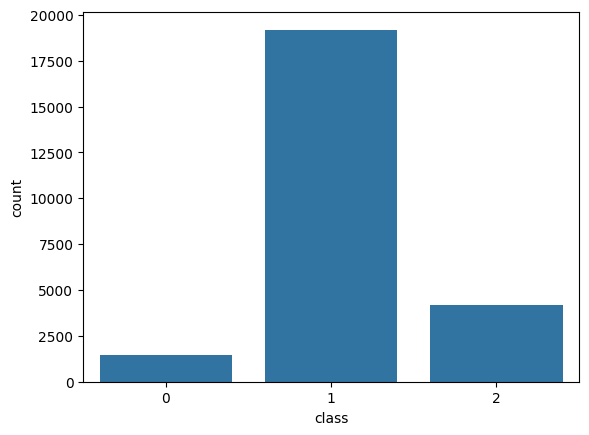

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data, x="class")

### sentences length

<Axes: >

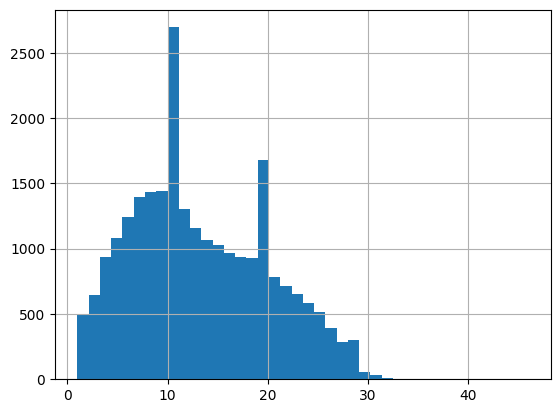

In [ ]:
# Let us take a look at distribution of words in each tweet
data["word_count"] = data["cleaned_tweet"].apply(
    lambda x: len(str(x).split(" "))
)
# data[["cleaned_tweet", "word_count"]].head(5)
data.cleaned_tweet.str.split().map(lambda x: len(x)).hist(bins=40)

## Text Mining

### Word cloud

**Word cloud** is visualization technique for understanding and determining patterns and evolving trends
- Cung cấp cái nhìn tổng quan nhanh về các từ xuất hiện thường xuyên nhất trong một tập văn bản, giúp xác định mẫu và chủ đề chính.
- Tóm tắt nội dung từ một lượng lớn văn bản, giúp người đọc dễ dàng nhận diện thông tin quan trọng.
- Phân tích cảm xúc, hashtag hoặc xu hướng trên mạng xã hội bằng cách hiển thị các từ phổ biến nhất.
- Tăng tính trực quan và hấp dẫn trong báo cáo, bài thuyết trình hoặc bảng điều khiển dữ liệu.
- So sánh tần suất từ giữa nhiều tài liệu hoặc nguồn văn bản khác nhau.

**Applications**:

- **Customer’s Feedback**: Các doanh nghiệp sử dụng Word Cloud để tổng hợp ý kiến từ khách hàng. Khi một công ty nhận hàng nghìn phản hồi, rất khó để đọc và ghi nhận từng ý kiến. Word Cloud giúp xác định nhanh các từ khóa quan trọng trong phản hồi, từ đó đánh giá xu hướng tích cực hay tiêu cực và cải thiện sản phẩm. Ví dụ, một công ty sản xuất TV có thể điều chỉnh sản phẩm dựa trên phản hồi thu được từ Word Cloud.

- **Trending Topics**: Các công ty quảng cáo cần theo dõi xu hướng để tạo nội dung phù hợp với các chủ đề nóng. Chẳng hạn, thương hiệu Amul thường tạo các quảng cáo sáng tạo dựa trên những vấn đề hoặc xu hướng đang được quan tâm. Word Cloud giúp họ nhanh chóng xác định các từ khóa phổ biến trong một thời điểm cụ thể.

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from wordcloud import WordCloud

# Importing Dataset
df = pd.read_csv("android-games.csv")
# Checking the Data
df.head()
# Checking for NaN values
df.isna().sum()
# Removing NaN Values
# df.dropna(inplace = True)
# Creating the text variable
text = " ".join(cat.split()[1] for cat in df.category)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color="white").generate(
    text
)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Feature Extraction

Preprocessing can involve extracting features from text, such as word frequencies, n-grams, or word embeddings, which are essential for building machine learning models.

### N-gram

test xem cặp từ nào xuất hiện nhiều nhất

In [74]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [
        (word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]


<Axes: >

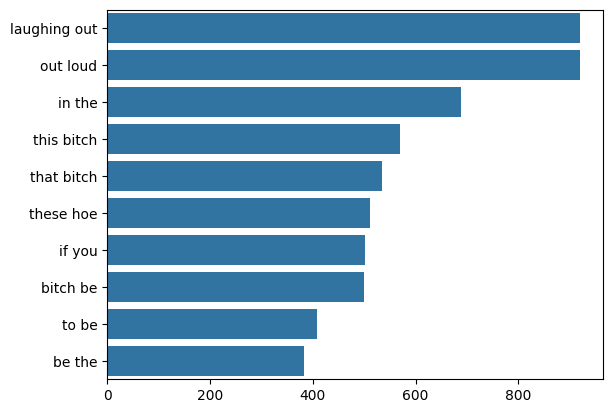

In [76]:
# Visualising the most frequent unigrams in the tweets
top_unigrams = get_top_ngram(data["cleaned_tweet"], 2)[:10]
x, y = map(list, zip(*top_unigrams))
sns.barplot(x=y, y=x)

<Axes: >

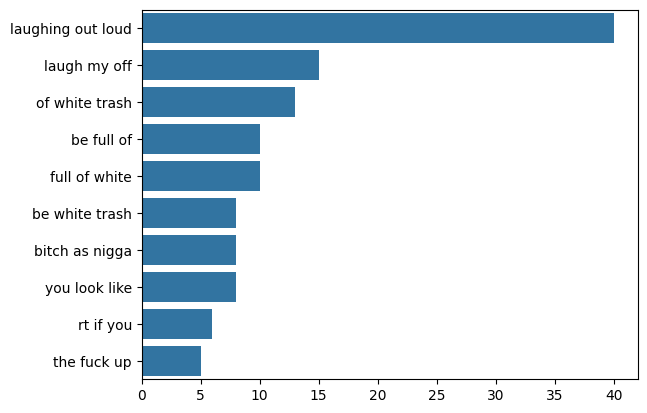

In [ ]:
# Visualising the most frequent unigrams in the tweets
top_unigrams = get_top_ngram(data.loc[data["class"] == 0, "cleaned_tweet"], 3)[
    :10
]
x, y = map(list, zip(*top_unigrams))
sns.barplot(x=y, y=x)

## Dimensionality Reduction

Text data often has a high dimensionality due to the presence of a large vocabulary. Preprocessing techniques like term frequency-inverse document frequency (TF-IDF) or dimensionality reduction methods can help.

In [81]:
from sklearn.model_selection import train_test_split

X = data["cleaned_tweet"]
y = data["class"]
seed = 51
test_size = 0.2  # 20% of the data in the
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed, stratify=data["class"]
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19826,) (4957,) (19826,) (4957,)


### TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# fit on the training data
X_train = vectorizer.fit_transform(X_train)
# transform the test data
X_test = vectorizer.transform(X_test)

X_train.shape, X_test.shape

((19826, 5000), (4957, 5000))